In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

model_name = "KAN"

In [36]:
#df = pd.read_csv("Data_Processed/Recommendation.csv")
df = pd.read_csv("../Data/Crop_production 2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [37]:
df = df.drop(["Unnamed: 0"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Crop_Type           99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
 11  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 9.1+ MB


In [38]:
# for i in df.columns:
#     print(i,df[i].unique(),df[i].nunique())

In [39]:
def outlier_info(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = df.shape[0]
    outlier_percentage = (outlier_count / total_count) * 100

    return outlier_count, outlier_percentage

def outlier_remover(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df
# for i in df.columns:
#     if df[i].dtype != "object":
#         sns.boxplot(df[i])
#         plt.show()
#         print(f"Outlier counter and percentage for {i}: {outlier_info(df, i)}")


In [40]:
df["Area_in_hectares"] = np.log(df["Area_in_hectares"])
df["Production_in_tons"] = np.log(df["Production_in_tons"])
df["Yield_ton_per_hec"] = np.log(df["Yield_ton_per_hec"])


df = outlier_remover(df,"N")
df = outlier_remover(df,"P")
df = outlier_remover(df,"K")
df = outlier_remover(df,"pH")
df = outlier_remover(df,"rainfall")
df = outlier_remover(df,"temperature")
df = outlier_remover(df,"Area_in_hectares")
df = outlier_remover(df,"Production_in_tons")
df = outlier_remover(df,"Yield_ton_per_hec")

# for i in df.columns:
#     if df[i].dtype != "object":
#         sns.boxplot(df[i])
#         plt.show()
#         print(f"Outlier counter and percentage for {i}: {outlier_info(df, i)}")


d:\Projects\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
# Plotting the class distribution
# plt.figure(figsize=(10, 6))
# sns.countplot(x=df['Crop'])
# plt.title('Class Distribution of Crop')
# plt.xlabel('Crop')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()

In [42]:
tt = df["Crop"].value_counts()
# print(tt)
df = df[df["Crop"] != "apple"]
df = df[df["Crop"] != "coffee"]
tt = df["Crop"].value_counts()
# print(tt)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

C = ["State_Name","Crop_Type","Crop"]
le_D = {}
for i in C:
    le_D[i] = LabelEncoder()
    df[i] = le_D[i].fit_transform(df[i])

bulk_scaler = StandardScaler()
features_to_scale = ["State_Name","Crop_Type","N","P","K","pH","rainfall","temperature","Area_in_hectares","Production_in_tons","Yield_ton_per_hec"]
#features_to_scale = ["N","P","K","pH","rainfall","temperature","Area_in_hectares","Yield_ton_per_hec"]
df[features_to_scale] = bulk_scaler.fit_transform(df[features_to_scale])

df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 99840 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99840 non-null  float64
 1   Crop_Type           99840 non-null  float64
 2   Crop                99840 non-null  int32  
 3   N                   99840 non-null  float64
 4   P                   99840 non-null  float64
 5   K                   99840 non-null  float64
 6   pH                  99840 non-null  float64
 7   rainfall            99840 non-null  float64
 8   temperature         99840 non-null  float64
 9   Area_in_hectares    99840 non-null  float64
 10  Production_in_tons  99840 non-null  float64
 11  Yield_ton_per_hec   99840 non-null  float64
dtypes: float64(11), int32(1)
memory usage: 9.5 MB


State_Name               33
Crop_Type                 4
Crop                     51
N                        14
P                        12
K                        12
pH                       82
rainfall                107
temperature             105
Area_in_hectares      26342
Production_in_tons    33212
Yield_ton_per_hec     71528
dtype: int64

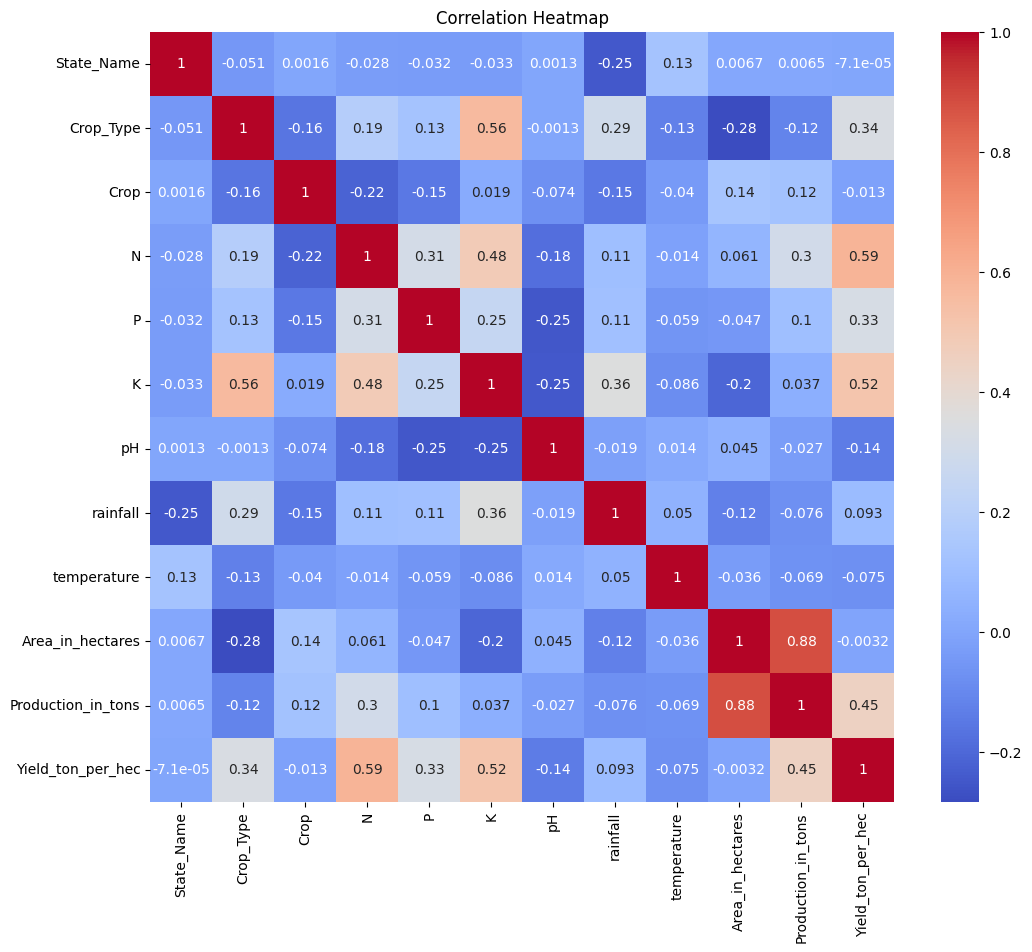

In [44]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [45]:
from sklearn.decomposition import PCA

t = df[["Production_in_tons","Area_in_hectares"]].values
pca = PCA(n_components=1)
X_pca = pca.fit_transform(t)

df = df.drop(["Production_in_tons","Area_in_hectares","Yield_ton_per_hec"],axis=1)
df["PCA"] = X_pca

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99840 entries, 0 to 99848
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State_Name   99840 non-null  float64
 1   Crop_Type    99840 non-null  float64
 2   Crop         99840 non-null  int32  
 3   N            99840 non-null  float64
 4   P            99840 non-null  float64
 5   K            99840 non-null  float64
 6   pH           99840 non-null  float64
 7   rainfall     99840 non-null  float64
 8   temperature  99840 non-null  float64
 9   PCA          99840 non-null  float64
dtypes: float64(9), int32(1)
memory usage: 8.0 MB


In [46]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split,TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from collections import Counter
from imblearn.over_sampling import *
data = df

In [47]:
import torch.nn.functional as F
class CropRecommendationModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CropRecommendationModel, self).__init__()
        self.initial_layers = nn.ModuleList([nn.Linear(1, hidden_size) for _ in range(input_size)])
        self.univariate_layers = nn.ModuleList([nn.Linear(hidden_size, hidden_size) for _ in range(input_size)])
        self.final_layers = nn.Sequential(
            nn.Linear(input_size * hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )
    
    def forward(self, x):
        univariate_outputs = []
        for i in range(x.size(1)):
            xi = x[:, i:i+1]
            hi = F.relu(self.initial_layers[i](xi))
            ui = F.relu(self.univariate_layers[i](hi))
            univariate_outputs.append(ui)
        combined_output = torch.cat(univariate_outputs, dim=1)
        output = self.final_layers(combined_output)
        return output

In [48]:
# import torchkan
# print(torchkan.__version__)


In [49]:
# import torch.nn.functional as F
# from torchkan import KAN

# class CropRecommendationModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_classes):
#         super(CropRecommendationModel, self).__init__()
#         self.kan = KAN(input_size=input_size, hidden_size=hidden_size, output_size=num_classes, num_blocks=4)
    
#     def forward(self, x):
#         output = self.kan(x)
#         return output

In [50]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA,IncrementalPCA
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.manifold import TSNE
#import shap
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.calibration import calibration_curve
from scipy.interpolate import make_interp_spline

def plot_tsne_pca(features, targets, target_names,name,sample_size=2000):
    # Subsample the data for faster computation
    if len(features) > sample_size:
        idx = np.random.choice(len(features), sample_size, replace=False)
        features_sampled = features[idx]
        targets_sampled = targets[idx]
    else:
        features_sampled = features
        targets_sampled = targets

    # TSNE
    tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
    tsne_results = tsne.fit_transform(features_sampled)
    
    for i, target_name in enumerate(target_names):
        plt.scatter(tsne_results[targets_sampled == i, 0], tsne_results[targets_sampled == i, 1], label=le_D["Crop"].inverse_transform([target_name])[0], s=10)
    plt.title("t-SNE")
    plt.grid()
    #plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    # plt.show()
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.savefig(f'../Results/{name}_tsne.png', bbox_inches='tight')
    plt.close()
    fig_legend = plt.figure(figsize=(10, 10))
    legend = plt.figlegend(handles, labels, loc='center', ncol=10)
    for label in legend.get_texts():
        label.set_ha('right')
    fig_legend.savefig(f'../Results/{name}_tsne_legend.png', bbox_inches='tight')
    plt.close()
    from IPython.display import Image, display
    display(Image(f'../Results/{name}_tsne.png'))
    display(Image(f'../Results/{name}_tsne_legend.png'))
    
    # PCA
    pca = IncrementalPCA(n_components=2)
    pca_results = pca.fit_transform(features_sampled)
    
    for i, target_name in enumerate(target_names):
        plt.scatter(pca_results[targets_sampled == i, 0], pca_results[targets_sampled == i, 1], label=le_D["Crop"].inverse_transform([target_name])[0], s=10)
    plt.title("PCA")
    plt.grid()
    # plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    # plt.show()
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.savefig(f'../Results/{name}_pca.png', bbox_inches='tight')
    plt.close()
    fig_legend = plt.figure(figsize=(10, 10))
    legend = plt.figlegend(handles, labels, loc='center', ncol=10)
    for label in legend.get_texts():
        label.set_ha('right')
    fig_legend.savefig(f'../Results/{name}_pca_legend.png', bbox_inches='tight')
    plt.close()
    from IPython.display import Image, display
    display(Image(f'../Results/{name}_pca.png'))
    display(Image(f'../Results/{name}_pca_legend.png'))

def plot_radar_chart(metrics_df,name):
    labels = metrics_df['Class']
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    for metric in metrics_df.columns[1:]:
        values = metrics_df[metric].tolist()
        values += values[:1]
        ax.plot(angles, values, label=metric)
        ax.fill(angles, values, alpha=0.1)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Metrics Radar Chart')
    plt.savefig(f"../Results/{name}_radar_chart.png")
    plt.show()
    
def compute_metrics(val_target, val_predicted, num_classes):
    precision, recall, f1, _ = precision_recall_fscore_support(val_target, val_predicted, average=None, labels=range(num_classes),zero_division=1)
    metrics = {
        'Class': range(num_classes),
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    return pd.DataFrame(metrics)

def train_validation(train_features, test_features, train_target, test_target,name,num_epochs=1100):

    input_size = train_features.shape[1]
    hidden_size = 64
    num_classes = len(data['Crop'].unique())

    model = CropRecommendationModel(input_size, hidden_size, num_classes).to("cuda")
    #model = torch.compile(model)
    # num_epochs = 1100
    learning_rate = 0.001
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []


    for epoch in range(num_epochs):
        # Training
        model.train()
        outputs = model(train_features)
        loss = criterion(outputs, train_target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())

        with torch.no_grad():
            _, train_predicted = torch.max(outputs.data, 1)
            train_correct = (train_predicted == train_target).sum().item()
            train_accuracy = train_correct / train_target.size(0)
            train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        with torch.no_grad():
            test_outputs = model(test_features)
            test_loss = criterion(test_outputs, test_target)
            _, test_predicted = torch.max(test_outputs.data, 1)
            test_correct = (test_predicted == test_target).sum().item()
            test_accuracy = test_correct / test_target.size(0)
            test_losses.append(test_loss.item())
            test_accuracies.append(test_accuracy)

    # Plotting all graphs in a single figure
    # Loss and Accuracy Graphs
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label='Train Loss', color="orange")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Epoch vs Loss Plot")
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), test_losses, label='Val Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Validation Epoch vs Loss Plot")
    plt.legend()
    plt.grid()
    plt.savefig(f'../Results/{name}_loss_plot.png')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy', color="orange")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Epoch vs Accuracy Plot")
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), test_accuracies, label='Val Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Validation Epoch vs Accuracy Plot")
    plt.legend()
    plt.grid()
    plt.savefig(f'../Results/{name}_accu_plot.png')
    plt.show()
    
    # Confusion Matrix
    model.eval()
    with torch.no_grad():
        test_outputs = model(test_features)
        _, test_predicted = torch.max(test_outputs.data, 1)
    
    test_predicted_names = le_D["Crop"].inverse_transform(test_predicted.cpu())
    test_target_names = le_D["Crop"].inverse_transform(test_target.cpu())
    cm = confusion_matrix(test_target_names, test_predicted_names)
    colors = ["#000000", "#ff0000"]  # Black and Red
    cmap = sns.color_palette(colors)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=0.5, linecolor='white')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.savefig(f'../Results/{name}_cm_plot.png')
    plt.show()
    
    
    
    model.eval()
    with torch.no_grad():
        outputs = model(test_features)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = (predicted == test_target).sum().item() / test_target.size(0)

    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    all_metrics = []
    fold_metrics = compute_metrics(test_target.cpu().numpy(), test_predicted.cpu().numpy(), num_classes)
    all_metrics.append(fold_metrics)
    avg_metrics = pd.concat(all_metrics).groupby('Class').mean().reset_index()
    avg_metrics['Class'] = le_D['Crop'].inverse_transform(avg_metrics['Class'].astype(int))
    plot_radar_chart(avg_metrics,name)
    
    val_target_onehot = nn.functional.one_hot(test_target, num_classes=num_classes).cpu().numpy()
    roc_auc_dict = {}

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(val_target_onehot[:, i], test_outputs.cpu().numpy()[:, i])
        roc_auc_dict[i] = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {le_D["Crop"].inverse_transform([i])[0]} (area = {roc_auc_dict[i]:0.2f})')

    # Plot diagonal line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid()

    # Capture the legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()

    # Save the ROC curve plot without the legend
    plt.savefig(f'../Results/{name}_roc_curve.png', bbox_inches='tight')
    plt.close()

    # Create a new figure for the legend
    fig_legend = plt.figure(figsize=(8, 6))
    plt.axis('off')
    legend = plt.figlegend(handles, labels, loc='center', ncol=5)
    for label in legend.get_texts():
        label.set_ha('right')
    fig_legend.savefig(f'../Results/{name}_roc_curve_legend.png', bbox_inches='tight')
    plt.close()

    # Show ROC curve and legend separately
    from IPython.display import Image, display
    display(Image(f'../Results/{name}_roc_curve.png'))
    display(Image(f'../Results/{name}_roc_curve_legend.png'))


    plot_tsne_pca(train_features.cpu(), train_target.cpu(), target_names=data['Crop'].unique(),name=name)
    return model, criterion

def cross_check(features, target, name, k=10, num_epochs=1100):
    learning_rate = 0.001
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_results = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(features)):
        train_features, val_features = features[train_idx], features[val_idx]
        train_target, val_target = target[train_idx], target[val_idx]
        input_size = train_features.shape[1]
        hidden_size = 64
        num_classes = len(data['Crop'].unique())

        model = CropRecommendationModel(input_size, hidden_size, num_classes).to("cuda")
        #model = torch.compile(model)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        xt = []
        train_losses = []
        val_losses = []

        for epoch in range(num_epochs):
            model.train()
            outputs = model(train_features)
            loss = criterion(outputs, train_target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            xt.append(epoch)
            train_losses.append(loss.item())

            model.eval()
            with torch.no_grad():
                val_outputs = model(val_features)
                val_loss = criterion(val_outputs, val_target)
                val_losses.append(val_loss.item())

        if fold == 0:
            xt = np.array(xt)
            train_losses = np.array(train_losses)
            val_losses = np.array(val_losses)
            plt.plot(xt, train_losses, label='Train Loss')
            plt.plot(xt, val_losses, label='Validation Loss')
            plt.xlabel("Epochs")
            plt.grid()
            plt.ylabel("Loss")
            plt.title("Epoch vs Loss Plot for Fold 1")
            plt.legend()
            plt.show()
            print(f'Epoch [{xt[-1]+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')

        model.eval()
        with torch.no_grad():
            train_outputs = model(train_features)
            train_loss = criterion(train_outputs, train_target)
            _, train_predicted = torch.max(train_outputs.data, 1)
            train_correct = (train_predicted == train_target).sum().item()
            train_accuracy = train_correct / train_target.size(0)

            val_outputs = model(val_features)
            val_loss = criterion(val_outputs, val_target)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_correct = (val_predicted == val_target).sum().item()
            val_accuracy = val_correct / val_target.size(0)

            # Compute additional metrics
            train_precision = precision_score(train_target.cpu(), train_predicted.cpu(), average='weighted',zero_division=0)
            train_recall = recall_score(train_target.cpu(), train_predicted.cpu(), average='weighted',zero_division=0)
            #train_recall_ng = recall_score(train_target.cpu(), train_predicted.cpu(), average='weighted',zero_division=0,pos_label=0)
            train_f1 = f1_score(train_target.cpu(), train_predicted.cpu(), average='weighted',zero_division=0)

            val_precision = precision_score(val_target.cpu(), val_predicted.cpu(), average='weighted',zero_division=0)
            val_recall = recall_score(val_target.cpu(), val_predicted.cpu(), average='weighted',zero_division=0)
            #val_recall_ng = recall_score(val_target.cpu(), val_predicted.cpu(), average='weighted',zero_division=0,pos_label=0)
            val_f1 = f1_score(val_target.cpu(), val_predicted.cpu(), average='weighted',zero_division=0)
            
            conf_mat_train = confusion_matrix(train_target.cpu(), train_predicted.cpu())
            conf_mat_val = confusion_matrix(val_target.cpu(), val_predicted.cpu())
            tnr_per_class_train = []
            tnr_per_class_val = []
            for i in range(len(conf_mat_train)):
                tn = np.sum(np.delete(np.delete(conf_mat_train, i, axis=0), i, axis=1))
                fp = np.sum(np.delete(conf_mat_train[:, i], i))
                tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
                tnr_per_class_train.append(tnr)
            for i in range(len(conf_mat_val)):
                tn = np.sum(np.delete(np.delete(conf_mat_val, i, axis=0), i, axis=1))
                fp = np.sum(np.delete(conf_mat_val[:, i], i))
                tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
                tnr_per_class_val.append(tnr)
            
            train_tnr = np.mean(tnr_per_class_train)
            val_tnr = np.mean(tnr_per_class_val)
            
        fold_results.append({
            'fold': fold+1,
            'train_loss': train_loss.item(),
            'train_accuracy': train_accuracy,
            'val_loss': val_loss.item(),
            'val_accuracy': val_accuracy,
            'train_precision': train_precision,
            'train_recall': train_recall,
            'train_tnr': train_tnr,
            'train_f1': train_f1,
            'val_precision': val_precision,
            'val_recall': val_recall,
            'val_tnr': val_tnr,
            'val_f1': val_f1
        })
        print(f'Fold {fold+1}, Train Loss: {train_loss.item()}, Train Accuracy: {train_accuracy*100:.2f}%, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy*100:.2f}%')
        print(f'Fold {fold+1}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f},Train Negative Rate: {train_tnr:.4f} ,Train F1: {train_f1:.4f}')
        print(f'Fold {fold+1}, Validation Precision: {val_precision:.4f}, Validation Recall: {val_recall:.4f},Validation Negative Rate: {val_tnr:.4f} ,Validation F1: {val_f1:.4f}')

    # Visualization of k-fold cross-validation results
    train_losses = [result['train_loss'] for result in fold_results]
    val_losses = [result['val_loss'] for result in fold_results]
    train_accuracies = [result['train_accuracy'] for result in fold_results]
    val_accuracies = [result['val_accuracy'] for result in fold_results]
    train_precisions = [result['train_precision'] for result in fold_results]
    val_precisions = [result['val_precision'] for result in fold_results]
    train_recalls = [result['train_recall'] for result in fold_results]
    val_recalls = [result['val_recall'] for result in fold_results]
    train_f1s = [result['train_f1'] for result in fold_results]
    val_f1s = [result['val_f1'] for result in fold_results]
    train_tnrs = [result['train_tnr'] for result in fold_results]
    val_tnrs = [result['val_tnr'] for result in fold_results]

    avg_train_loss = np.mean(train_losses)
    avg_val_loss = np.mean(val_losses)
    avg_train_accuracy = np.mean(train_accuracies)
    avg_val_accuracy = np.mean(val_accuracies)
    avg_train_precision = np.mean(train_precisions)
    avg_val_precision = np.mean(val_precisions)
    avg_train_recall = np.mean(train_recalls)
    avg_val_recall = np.mean(val_recalls)
    avg_train_f1 = np.mean(train_f1s)
    avg_val_f1 = np.mean(val_f1s)
    avg_train_tnr = np.mean(train_tnrs)
    avg_val_tnr = np.mean(val_tnrs)
    
    avg_results = {
            'fold': "Average",
            'train_loss': avg_train_loss,
            'train_accuracy': avg_train_accuracy,
            'val_loss': avg_val_loss,
            'val_accuracy': avg_val_accuracy,
            'train_precision': avg_train_precision,
            'train_recall': avg_train_recall,
            'train_tnr': avg_train_tnr,
            'train_f1': avg_train_f1,
            'val_precision': avg_val_precision,
            'val_recall': avg_val_recall,
            'val_tnr': avg_val_tnr,
            'val_f1': avg_val_f1
        }
    
    fold_results.append(avg_results)
    results_df = pd.DataFrame(fold_results)

    def smooth_curve(x, y):
        x_smooth = np.linspace(min(x), max(x), 300)
        spl = make_interp_spline(x, y, k=3)
        y_smooth = spl(x_smooth)
        return x_smooth, y_smooth

    plt.figure(figsize=(20, 16))

    # Plotting losses for each fold
    plt.subplot(6, 1, 1)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_losses)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Loss')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_losses)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Loss')
    plt.xlabel("Fold")
    plt.ylabel("Loss")
    plt.title("Loss per Fold")
    plt.grid()
    plt.legend()

    # Plotting accuracies for each fold
    plt.subplot(6, 1, 2)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_accuracies)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Accuracy')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_accuracies)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Accuracy')
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy per Fold")
    plt.grid()
    plt.legend()

    # Plotting precision for each fol6
    plt.subplot(6, 1, 3)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_precisions)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Precision')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_precisions)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Precision')
    plt.xlabel("Fold")
    plt.ylabel("Precision")
    plt.title("Precision per Fold")
    plt.grid()
    plt.legend()

    # Plotting recall for each fold
    plt.subplot(6, 1, 4)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_recalls)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Recall')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_recalls)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Recall')
    plt.xlabel("Fold")
    plt.ylabel("Recall")
    plt.title("Recall per Fold")
    plt.grid()
    plt.legend()
    
    plt.subplot(6, 1, 5)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_tnrs)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Negative Rate')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_tnrs)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Negative Rate')
    plt.xlabel("Fold")
    plt.ylabel("Recall")
    plt.title("Recall per Fold")
    plt.grid()
    plt.legend()


    # Plotting F1 score for each fold
    plt.subplot(6, 1, 6)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_f1s)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train F1')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_f1s)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation F1')
    plt.xlabel("Fold")
    plt.ylabel("F1 Score")
    plt.title("F1 Score per Fold")
    plt.grid()
    plt.legend()


    plt.tight_layout()
    plt.savefig(f'../Results/{name}_Xvalidation_plot.png')
    plt.show()

    print(f'Average Train Loss: {avg_train_loss:.4f}')
    print(f'Average Validation Loss: {avg_val_loss:.4f}')
    print(f'Average Train Accuracy: {avg_train_accuracy:.4f}')
    print(f'Average Validation Accuracy: {avg_val_accuracy:.4f}')
    print(f'Average Train Precision: {avg_train_precision:.4f}')
    print(f'Average Validation Precision: {avg_val_precision:.4f}')
    print(f'Average Train Recall: {avg_train_recall:.4f}')
    print(f'Average Validation Recall: {avg_val_recall:.4f}')
    print(f'Average Train Negative Rate: {avg_train_tnr:.4f}')
    print(f'Average Validation Negative Rate: {avg_val_tnr:.4f}')
    print(f'Average Train F1: {avg_train_f1:.4f}')
    print(f'Average Validation F1: {avg_val_f1:.4f}')
    
    return results_df

In [51]:
from pyswarm import pso

# Store the history of PSO
pso_history = []

# Define the fitness function with logging for visualization
def fitness_function(params, train_features, test_features, train_target, test_target):
    global pso_history  # To store history
    
    # Extract the hyperparameters
    num_epochs = int(params[0])
    learning_rate = params[1]

    # Define the model
    input_size = train_features.shape[1]
    hidden_size = 64
    num_classes = len(train_target.unique())

    model = CropRecommendationModel(input_size, hidden_size, num_classes).to("cuda")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training and Validation loop
    for epoch in range(num_epochs):
        model.train()
        outputs = model(train_features)
        loss = criterion(outputs, train_target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        test_outputs = model(test_features)
        test_loss = criterion(test_outputs, test_target)
        _, test_predicted = torch.max(test_outputs.data, 1)
        test_correct = (test_predicted == test_target).sum().item()
        test_accuracy = test_correct / test_target.size(0)

    # Store the current state
    pso_history.append({
        'num_epochs': num_epochs,
        'learning_rate': learning_rate,
        'test_accuracy': test_accuracy
    })

    return -test_accuracy  # Since we want to maximize accuracy, minimize negative accuracy

# PSO wrapper function
def pso_optimize(train_features, test_features, train_target, test_target, lb, ub, num_particles=10, maxiter=20):
    global pso_history
    pso_history = []  # Reset history

    # Run PSO
    optimal_params, optimal_val = pso(
        fitness_function,
        lb,
        ub,
        args=(train_features, test_features, train_target, test_target),
        swarmsize=num_particles,
        maxiter=maxiter
    )

    optimal_num_epochs = int(optimal_params[0])
    optimal_learning_rate = optimal_params[1]

    print(f"Optimal num_epochs: {optimal_num_epochs}")
    print(f"Optimal learning_rate: {optimal_learning_rate}")
    print(f"Optimal validation accuracy: {-optimal_val}")

    # Visualization
    visualize_pso_history(pso_history)

    return optimal_num_epochs, optimal_learning_rate

# Function to visualize the PSO history
def visualize_pso_history(history):
    # Convert history to a DataFrame for easier plotting
    import pandas as pd
    history_df = pd.DataFrame(history)

    plt.figure(figsize=(14, 6))

    # Plot validation accuracy over iterations
    sns.lineplot(data=history_df, x=history_df.index, y="test_accuracy", marker="o")
    plt.title("PSO Optimization Progress")
    plt.xlabel("Iteration")
    plt.ylabel("Validation Accuracy")
    plt.show()

    # Plot the evolution of num_epochs and learning_rate
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.lineplot(data=history_df, x=history_df.index, y="num_epochs", marker="o", ax=axes[0])
    axes[0].set_title("Evolution of num_epochs")
    axes[0].set_xlabel("Iteration")
    axes[0].set_ylabel("num_epochs")

    sns.lineplot(data=history_df, x=history_df.index, y="learning_rate", marker="o", ax=axes[1])
    axes[1].set_title("Evolution of learning_rate")
    axes[1].set_xlabel("Iteration")
    axes[1].set_ylabel("learning_rate")

    plt.tight_layout()
    plt.show()

# Example usage
# Define the bounds for the hyperparameters
lb = [100, 0.0001]  # Lower bounds: [num_epochs, learning_rate]
ub = [2000, 0.01]  # Upper bounds: [num_epochs, learning_rate]

In [52]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek,SMOTEENN


In [53]:

features = data.drop(columns=['Crop']).values
target = data['Crop'].values


features = torch.tensor(features, dtype=torch.float32).float().to("cuda")
target = torch.tensor(target, dtype=torch.long).long().to("cuda")
name = f"{model_name}_Simple"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
# optimal_num_epochs, optimal_learning_rate = pso_optimize(
#     train_features, 
#     test_features, 
#     train_target, 
#     test_target, 
#     lb, 
#     ub,
#     num_particles=10,
#     maxiter=5
# )

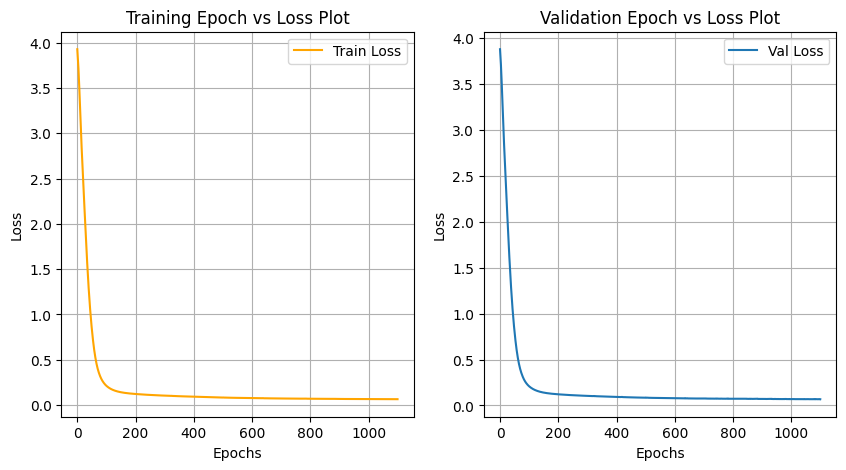

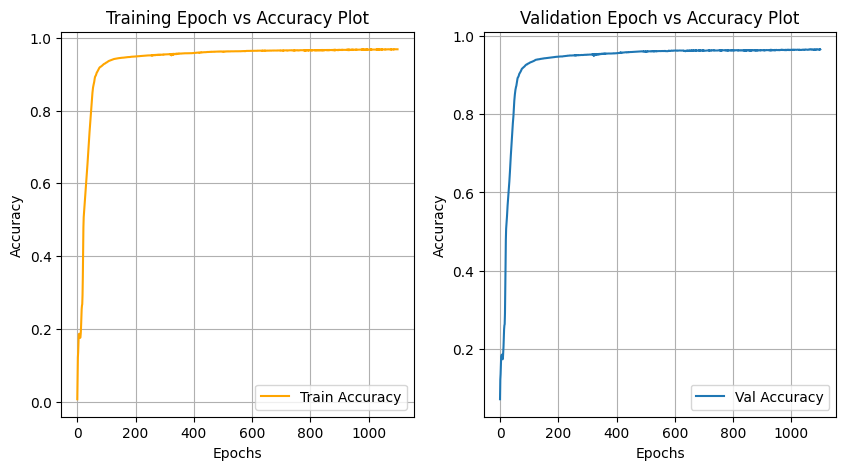

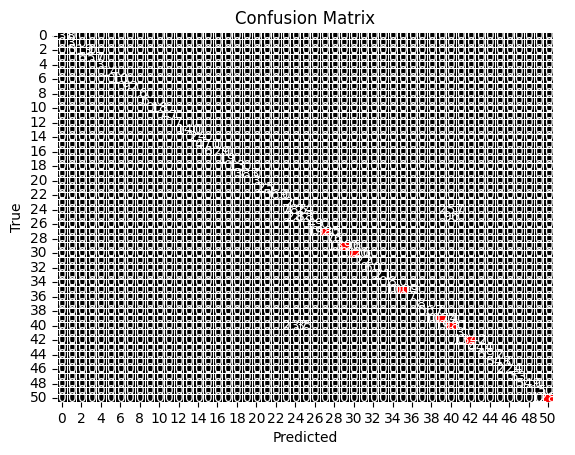

Test Accuracy: 96.61%


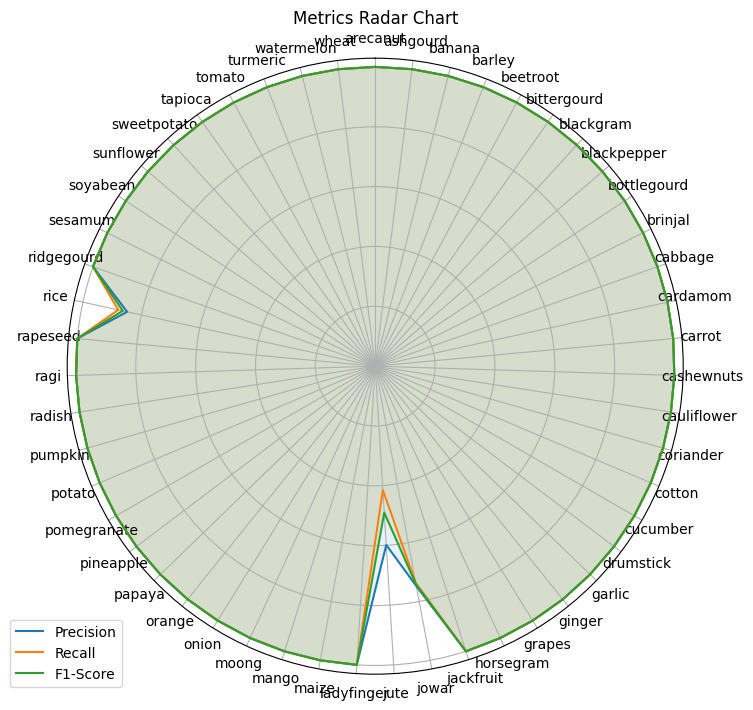

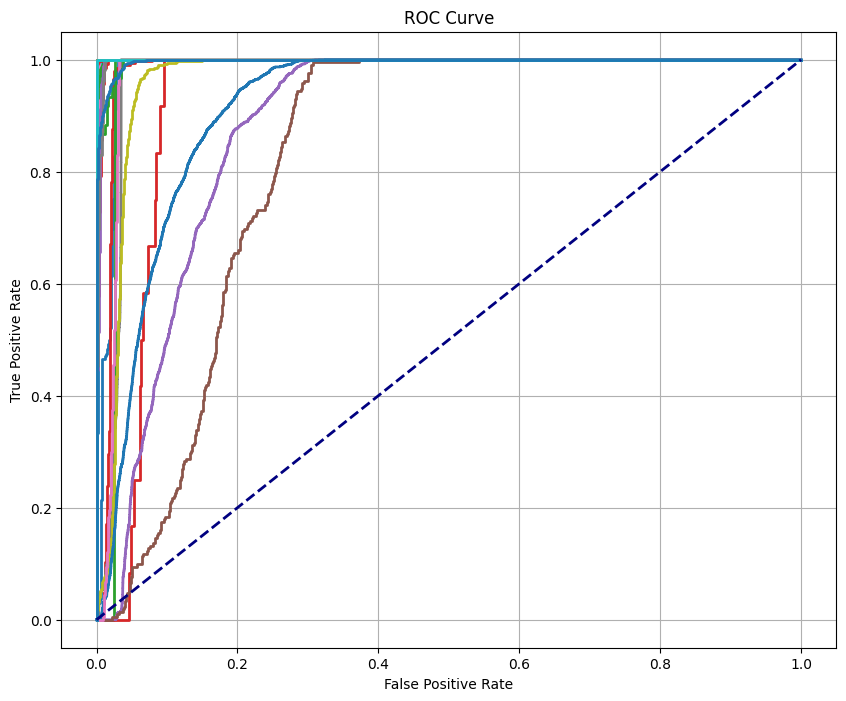

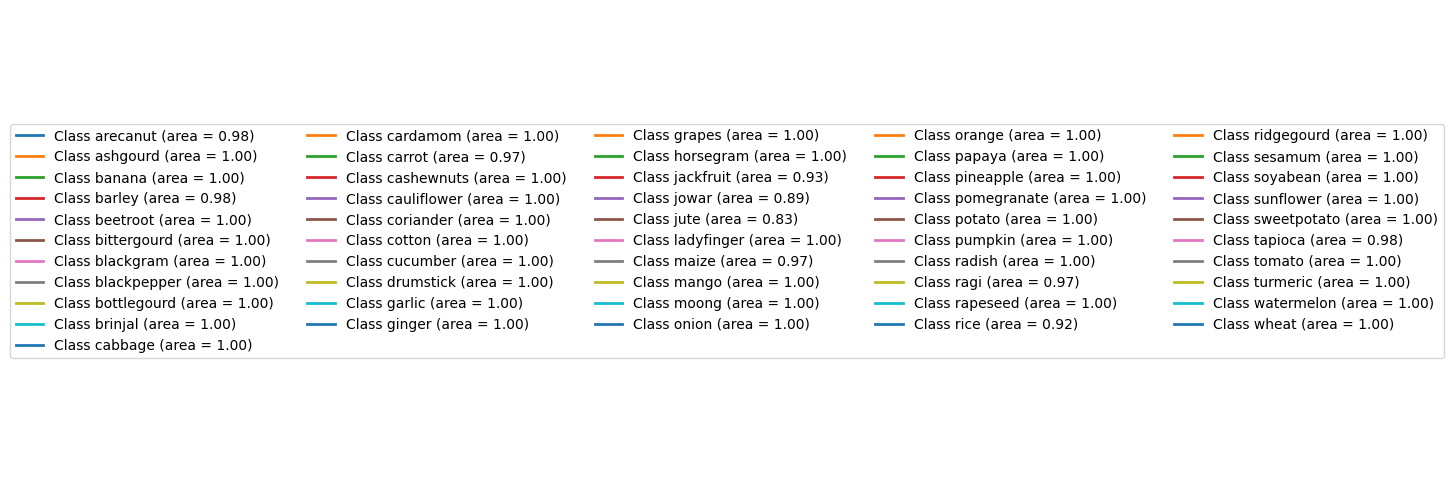

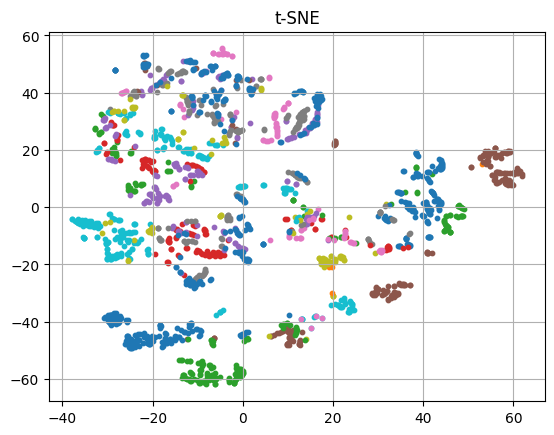

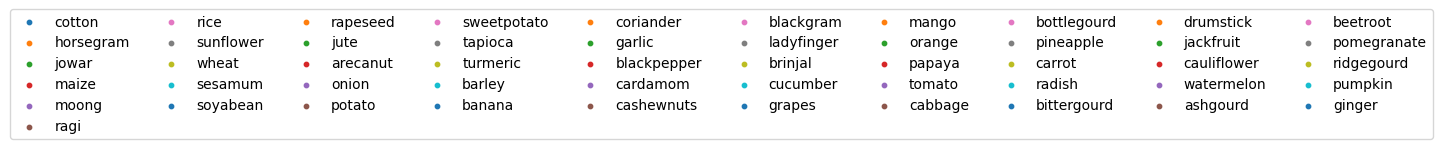

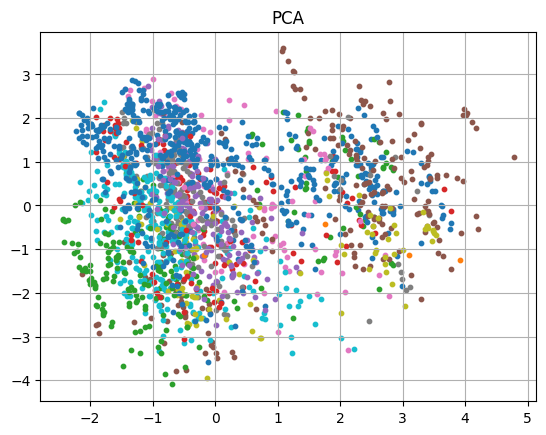

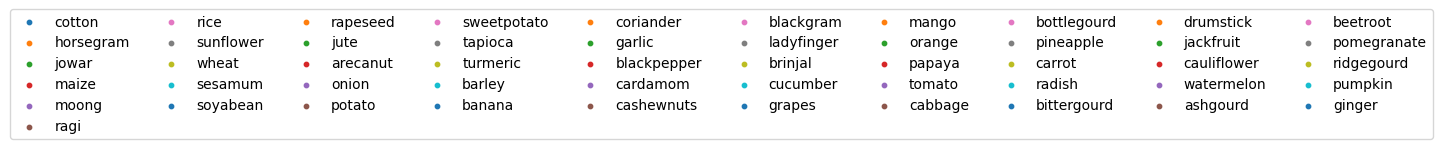

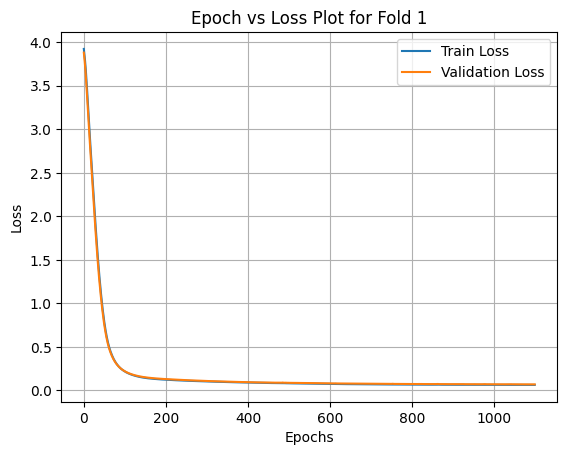

Epoch [1100/1100], Train Loss: 0.0627, Validation Loss: 0.0689
Fold 1, Train Loss: 0.0626155287027359, Train Accuracy: 96.90%, Validation Loss: 0.06887219846248627, Validation Accuracy: 96.57%
Fold 1, Train Precision: 0.9681, Train Recall: 0.9690,Train Negative Rate: 0.9993 ,Train F1: 0.9680
Fold 1, Validation Precision: 0.9651, Validation Recall: 0.9657,Validation Negative Rate: 0.9992 ,Validation F1: 0.9646
Fold 2, Train Loss: 0.06318575143814087, Train Accuracy: 96.90%, Validation Loss: 0.06655257195234299, Validation Accuracy: 96.66%
Fold 2, Train Precision: 0.9690, Train Recall: 0.9690,Train Negative Rate: 0.9993 ,Train F1: 0.9687
Fold 2, Validation Precision: 0.9677, Validation Recall: 0.9666,Validation Negative Rate: 0.9993 ,Validation F1: 0.9664
Fold 3, Train Loss: 0.06518007814884186, Train Accuracy: 96.90%, Validation Loss: 0.0673137754201889, Validation Accuracy: 96.75%
Fold 3, Train Precision: 0.9684, Train Recall: 0.9690,Train Negative Rate: 0.9993 ,Train F1: 0.9685
Fold 3

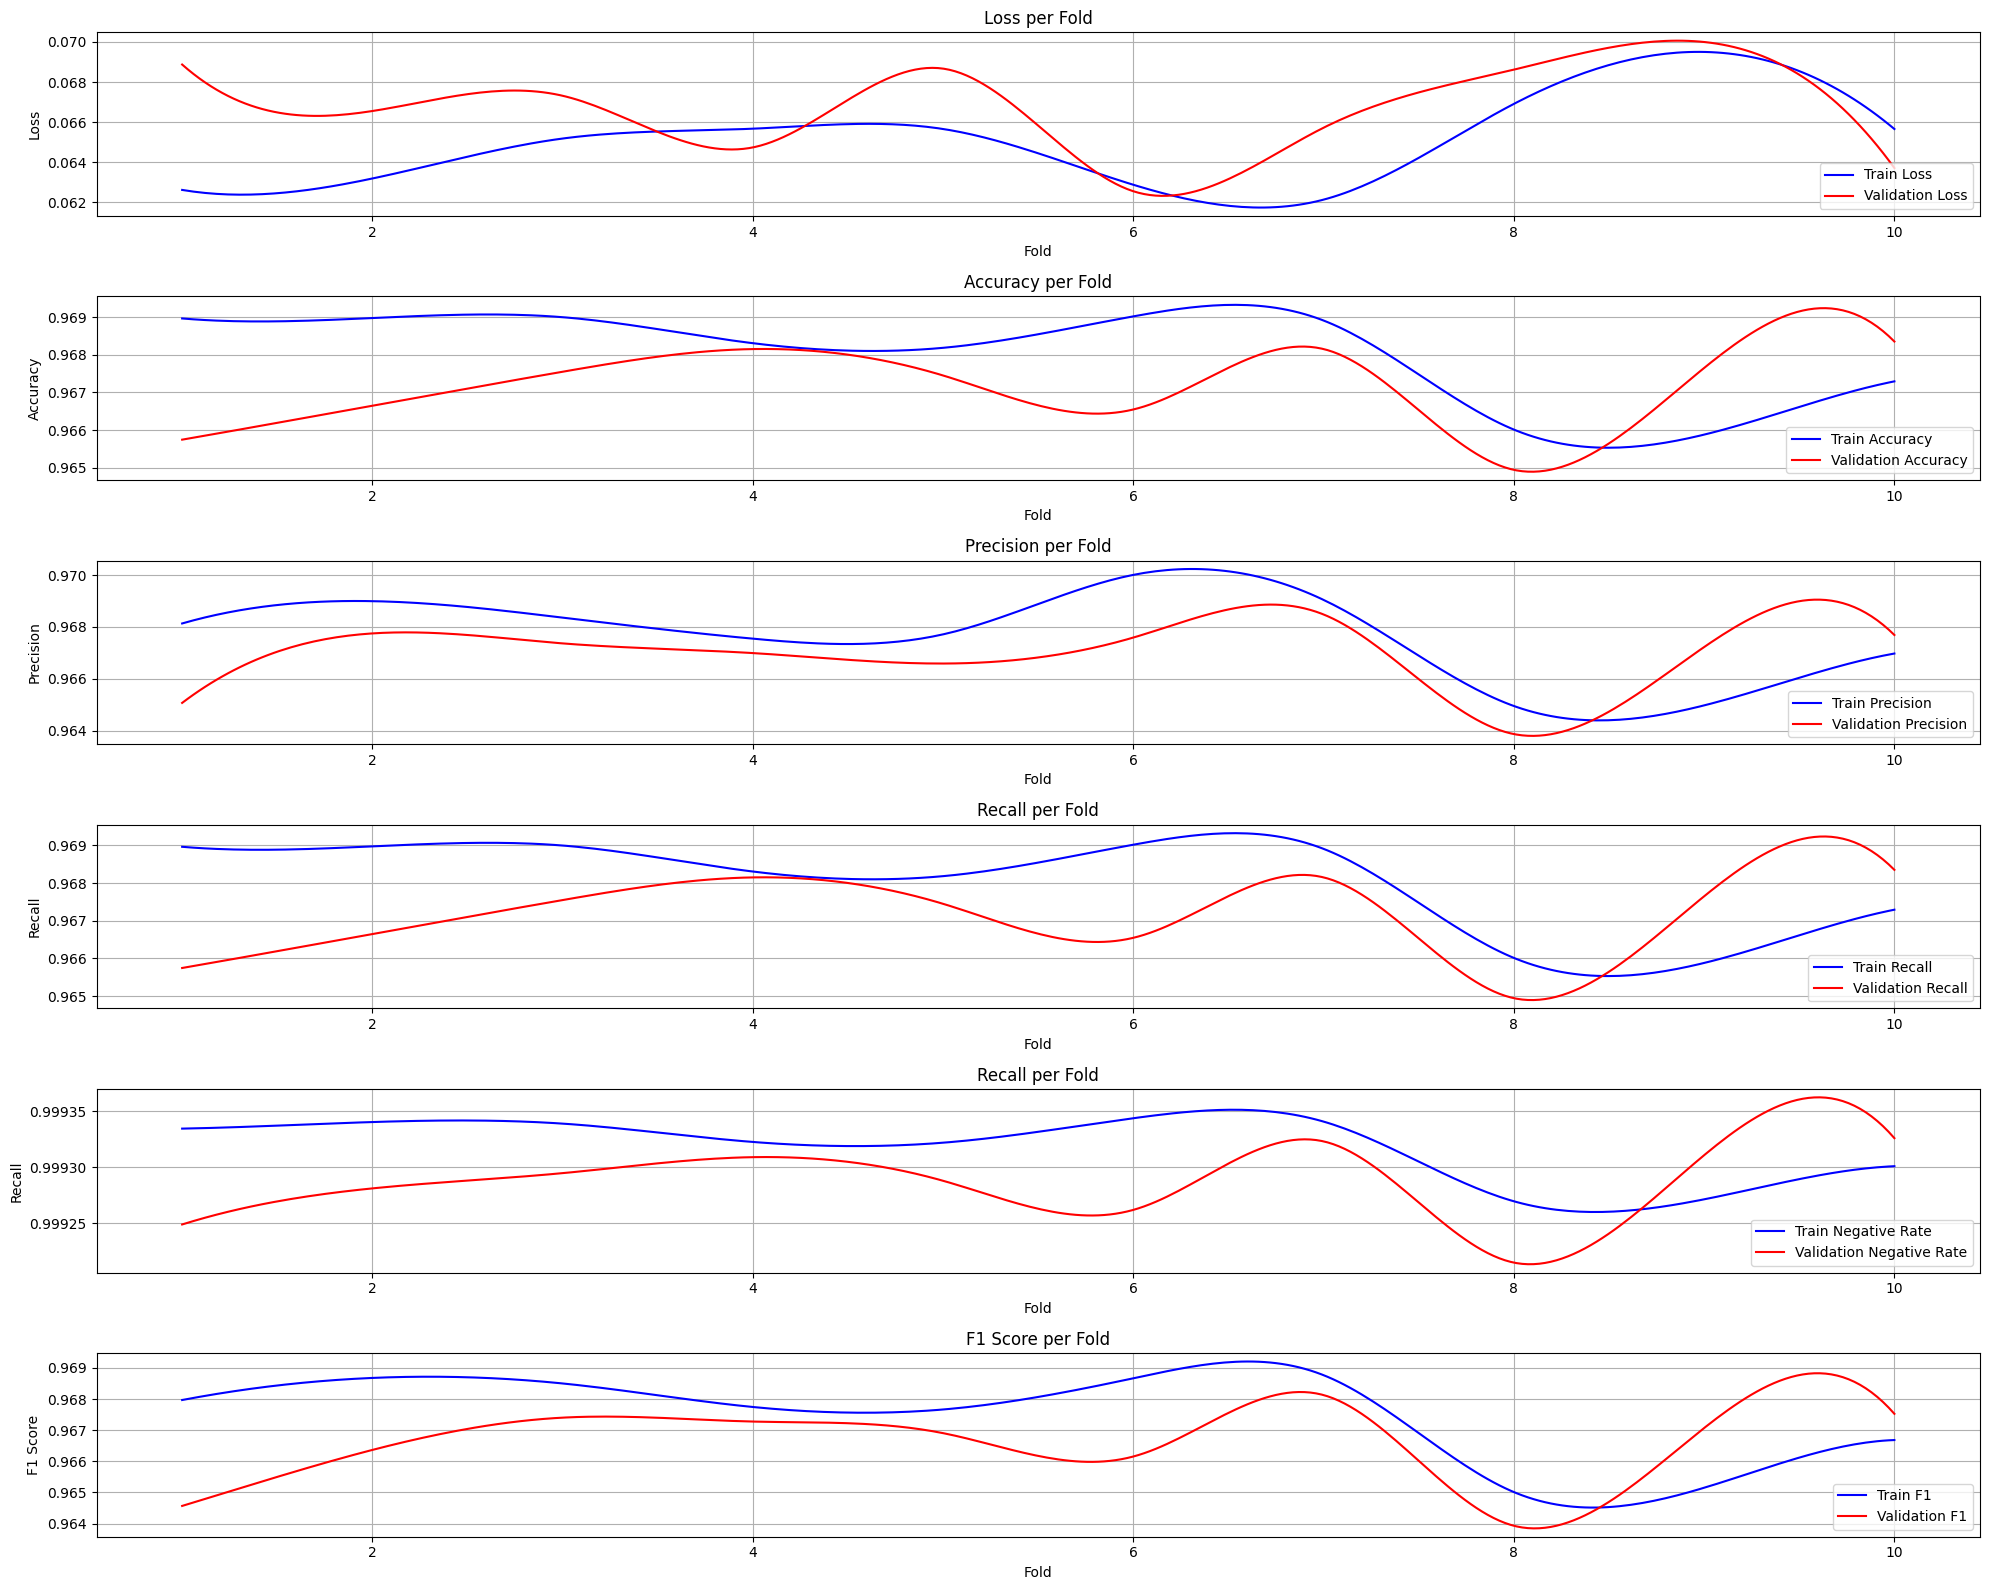

Average Train Loss: 0.0649
Average Validation Loss: 0.0667
Average Train Accuracy: 0.9681
Average Validation Accuracy: 0.9671
Average Train Precision: 0.9677
Average Validation Precision: 0.9669
Average Train Recall: 0.9681
Average Validation Recall: 0.9671
Average Train Negative Rate: 0.9993
Average Validation Negative Rate: 0.9993
Average Train F1: 0.9675
Average Validation F1: 0.9665


In [54]:

model,criterion = train_validation(train_features, test_features, train_target, test_target,name)
df1 = cross_check(features,target,name)


In [55]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values

print("Random OverSampler")
ROSample = RandomOverSampler(sampling_strategy="all")
features,target = ROSample.fit_resample(features,target)


features = torch.tensor(features, dtype=torch.float32).float().to("cuda")
target = torch.tensor(target, dtype=torch.long).long().to("cuda")
name = f"{model_name}_ROS"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model,criterion = train_validation(train_features, test_features, train_target, test_target,name)
df2 = cross_check(features,target,name)


Random OverSampler


Random UnderSampler


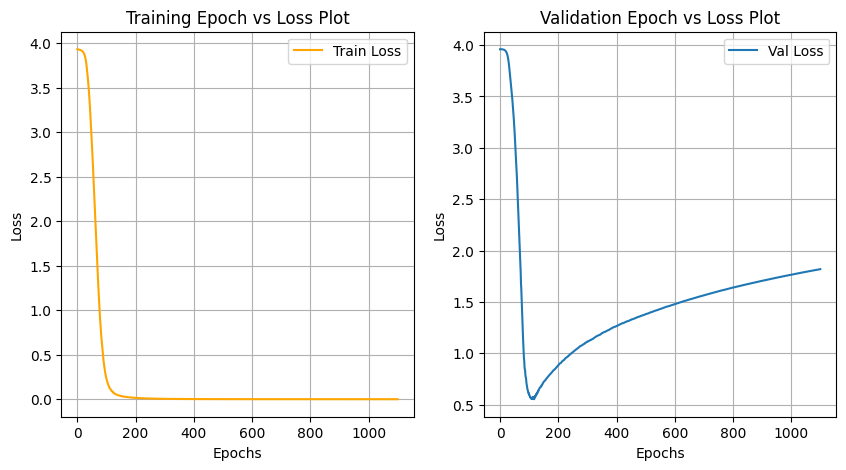

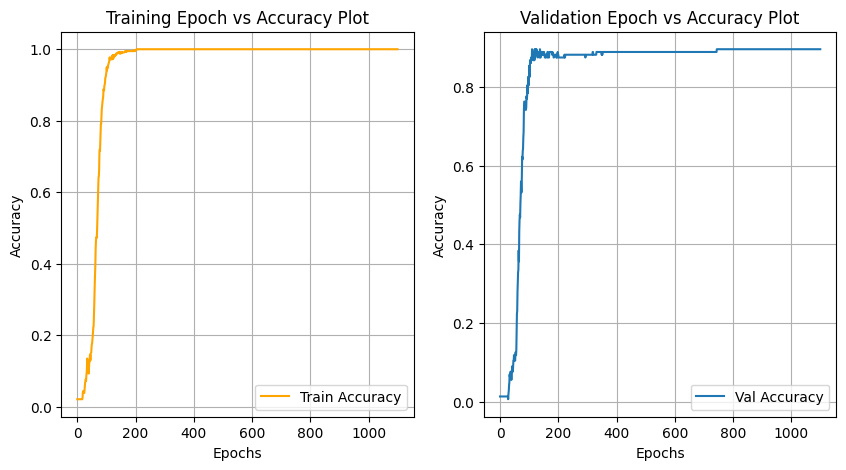

Test Accuracy: 89.51%


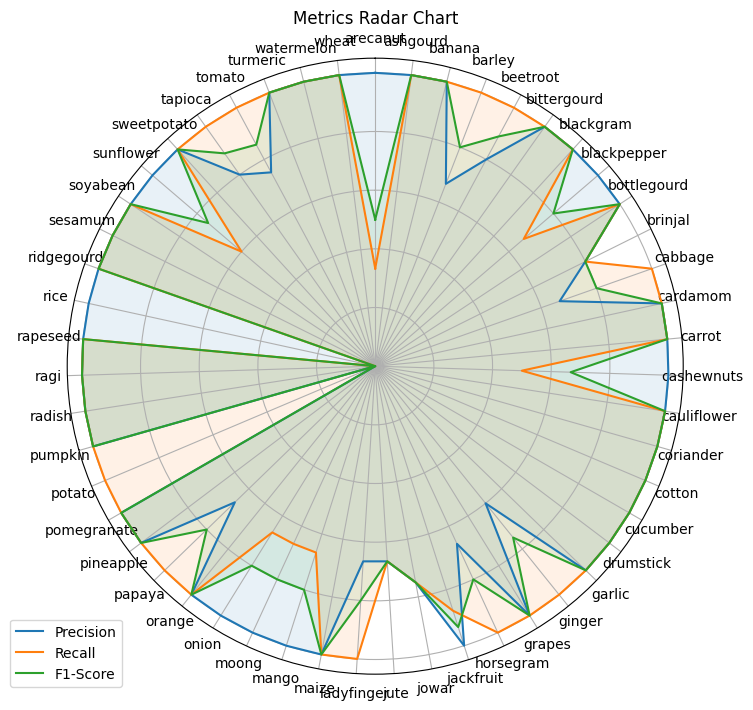

c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


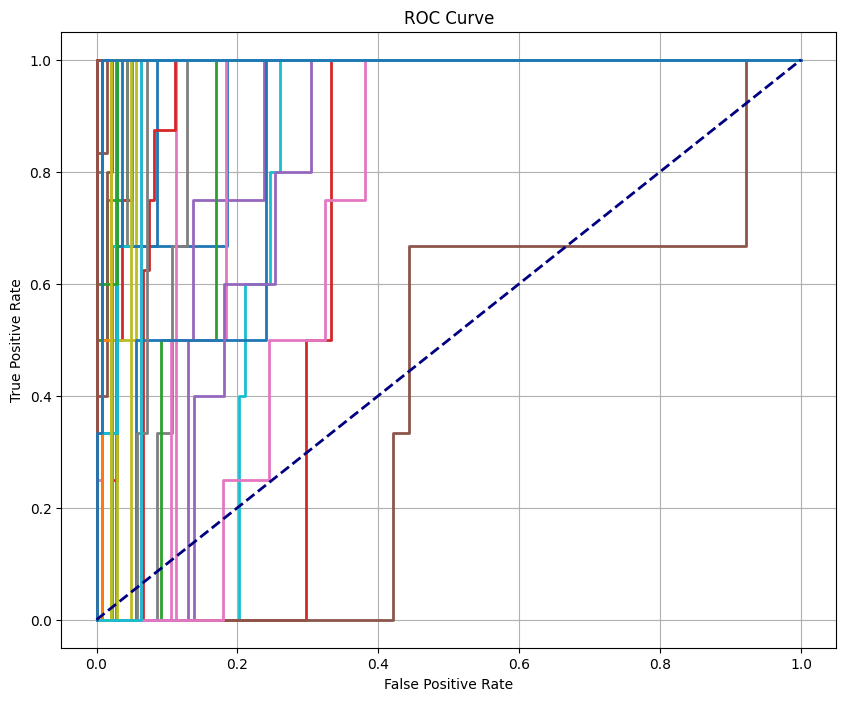

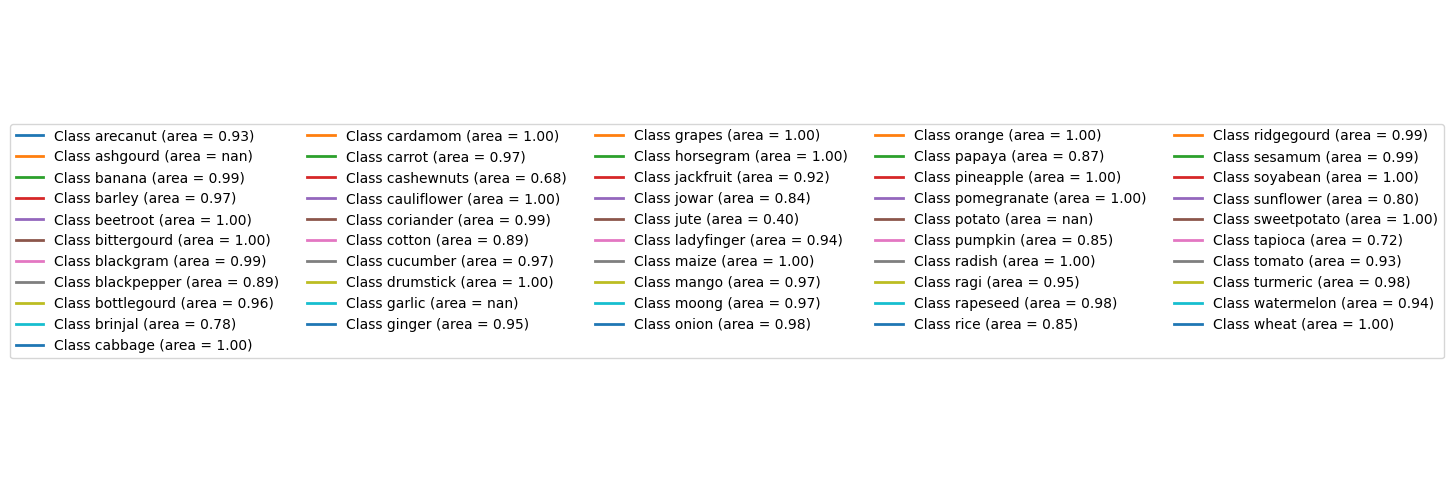

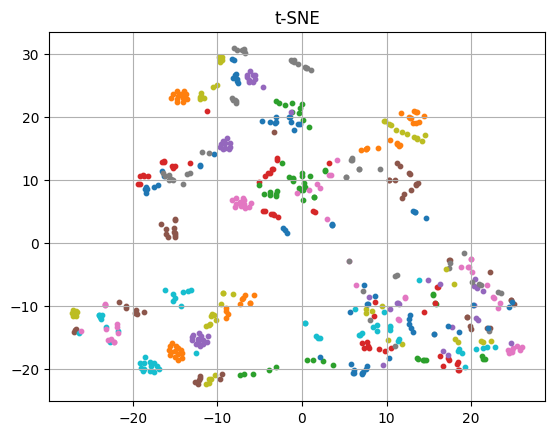

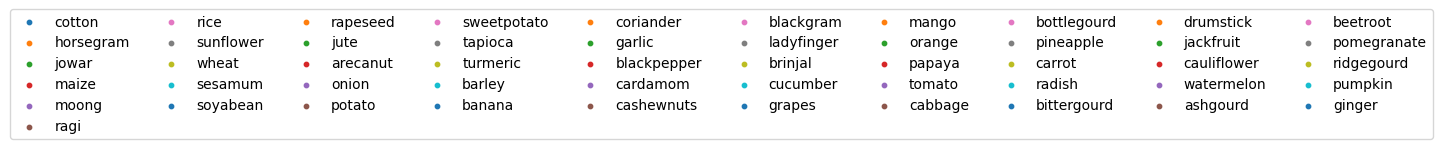

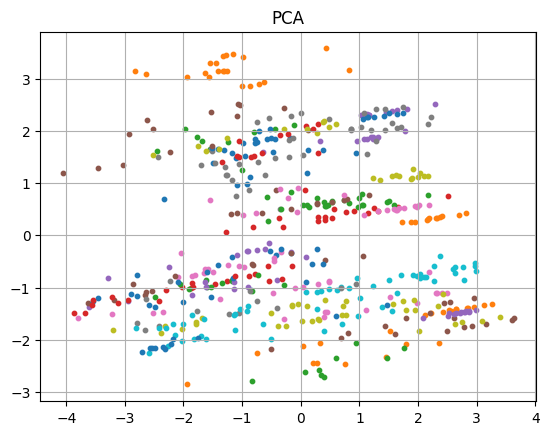

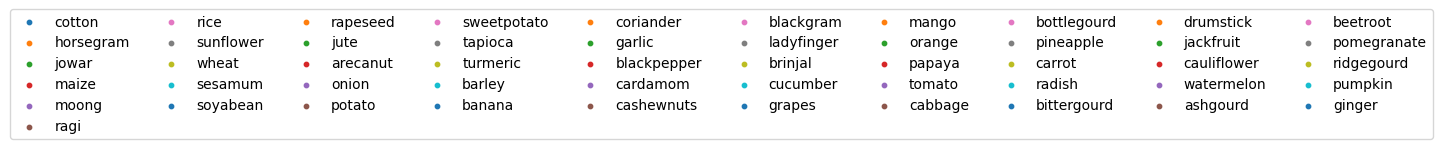

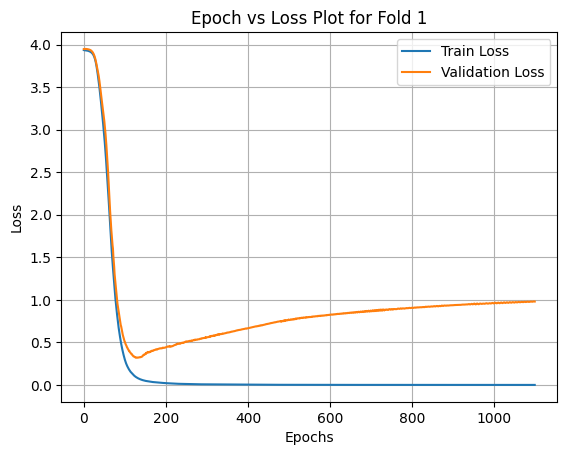

Epoch [1100/1100], Train Loss: 0.0001, Validation Loss: 0.9800
Fold 1, Train Loss: 0.00011872894538100809, Train Accuracy: 100.00%, Validation Loss: 0.9799680709838867, Validation Accuracy: 93.06%
Fold 1, Train Precision: 1.0000, Train Recall: 1.0000,Train Negative Rate: 1.0000 ,Train F1: 1.0000
Fold 1, Validation Precision: 0.9074, Validation Recall: 0.9306,Validation Negative Rate: 0.9983 ,Validation F1: 0.9131
Fold 2, Train Loss: 0.0001460149942431599, Train Accuracy: 100.00%, Validation Loss: 0.5107375383377075, Validation Accuracy: 93.06%
Fold 2, Train Precision: 1.0000, Train Recall: 1.0000,Train Negative Rate: 1.0000 ,Train F1: 1.0000
Fold 2, Validation Precision: 0.9218, Validation Recall: 0.9306,Validation Negative Rate: 0.9981 ,Validation F1: 0.9186
Fold 3, Train Loss: 0.00015163226635195315, Train Accuracy: 100.00%, Validation Loss: 0.91447913646698, Validation Accuracy: 88.89%
Fold 3, Train Precision: 1.0000, Train Recall: 1.0000,Train Negative Rate: 1.0000 ,Train F1: 1.000

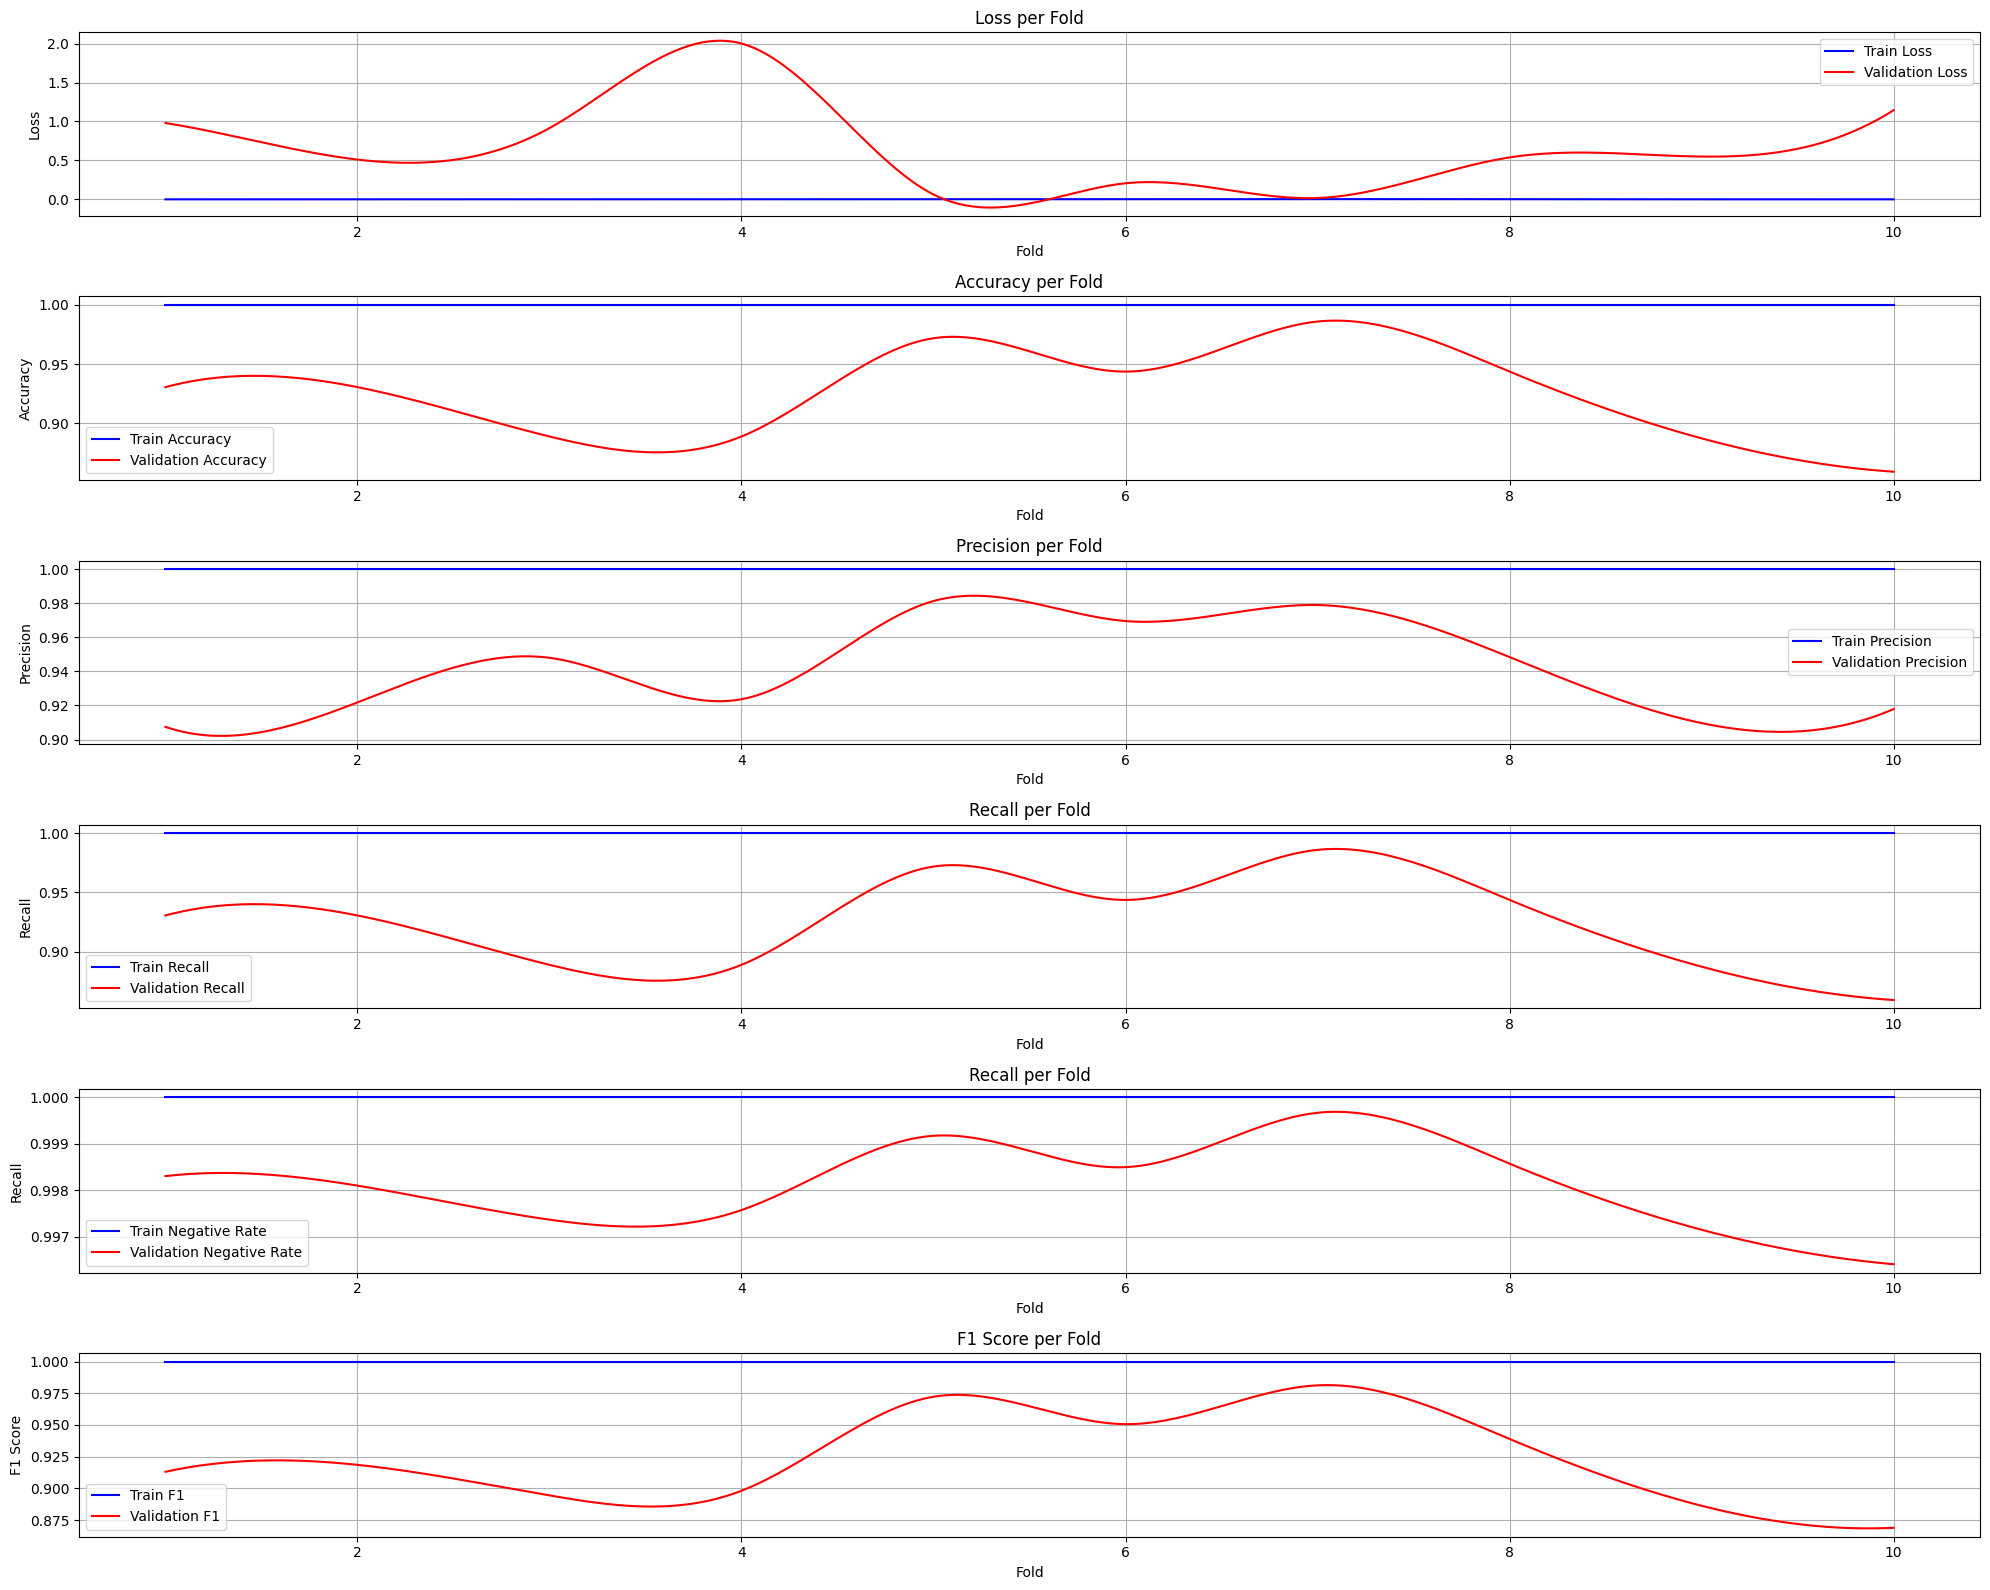

Average Train Loss: 0.0005
Average Validation Loss: 0.6924
Average Train Accuracy: 1.0000
Average Validation Accuracy: 0.9230
Average Train Precision: 1.0000
Average Validation Precision: 0.9406
Average Train Recall: 1.0000
Average Validation Recall: 0.9230
Average Train Negative Rate: 1.0000
Average Validation Negative Rate: 0.9981
Average Train F1: 1.0000
Average Validation F1: 0.9223


In [ ]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values

print("Random UnderSampler")
ROSample = RandomUnderSampler(sampling_strategy="all")
features,target = ROSample.fit_resample(features,target)


features = torch.tensor(features, dtype=torch.float32).float().to("cuda")
target = torch.tensor(target, dtype=torch.long).long().to("cuda")
name = f"{model_name}_RUS"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model,criterion = train_validation(train_features, test_features, train_target, test_target,name)
df3 = cross_check(features,target,name)

SMOTE


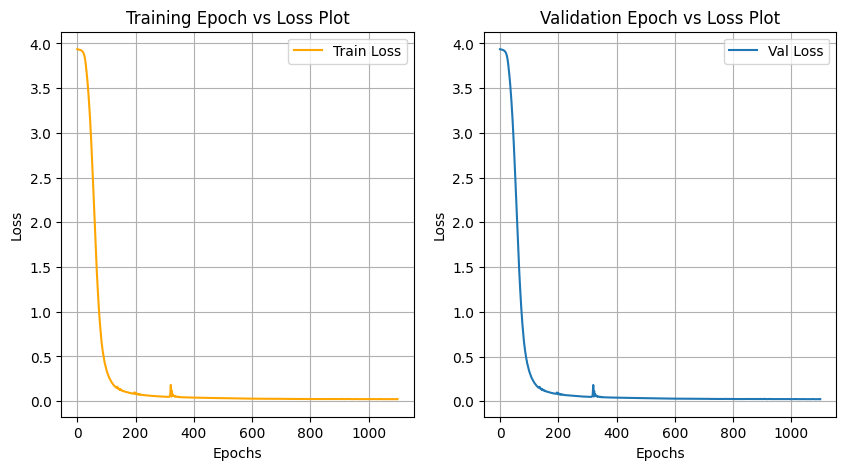

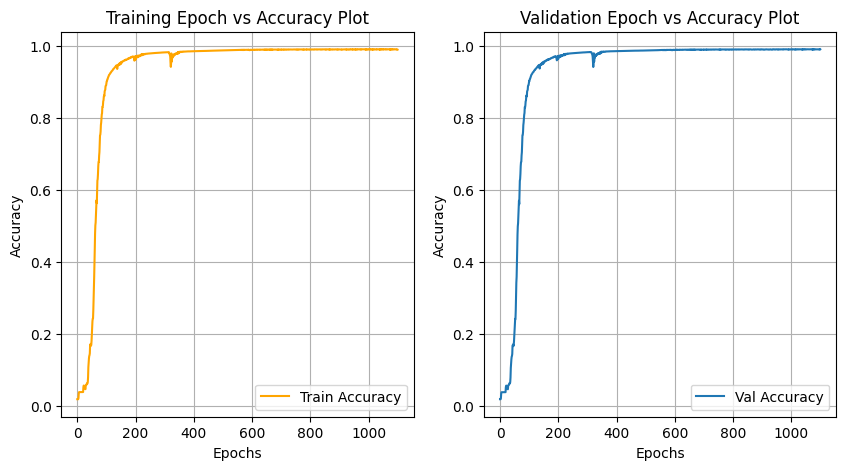

Test Accuracy: 99.06%


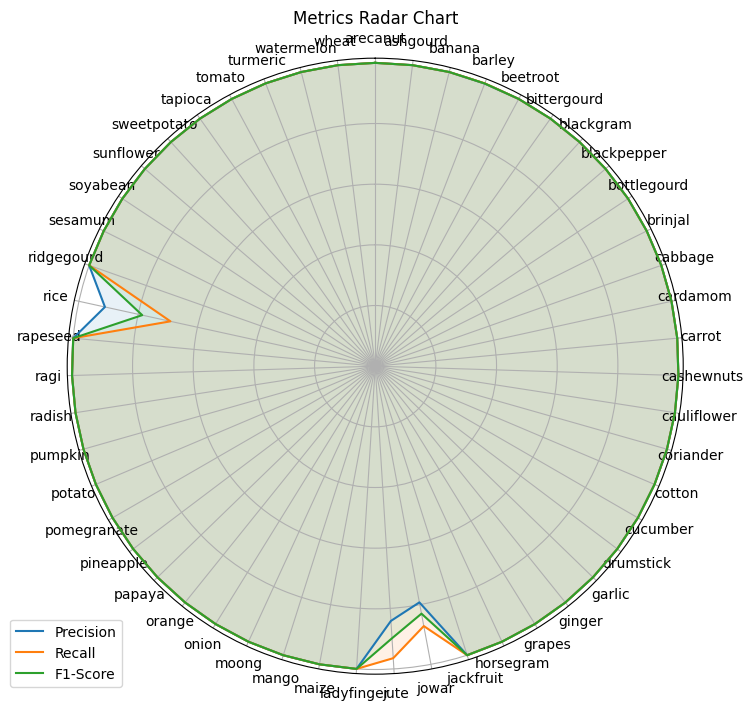

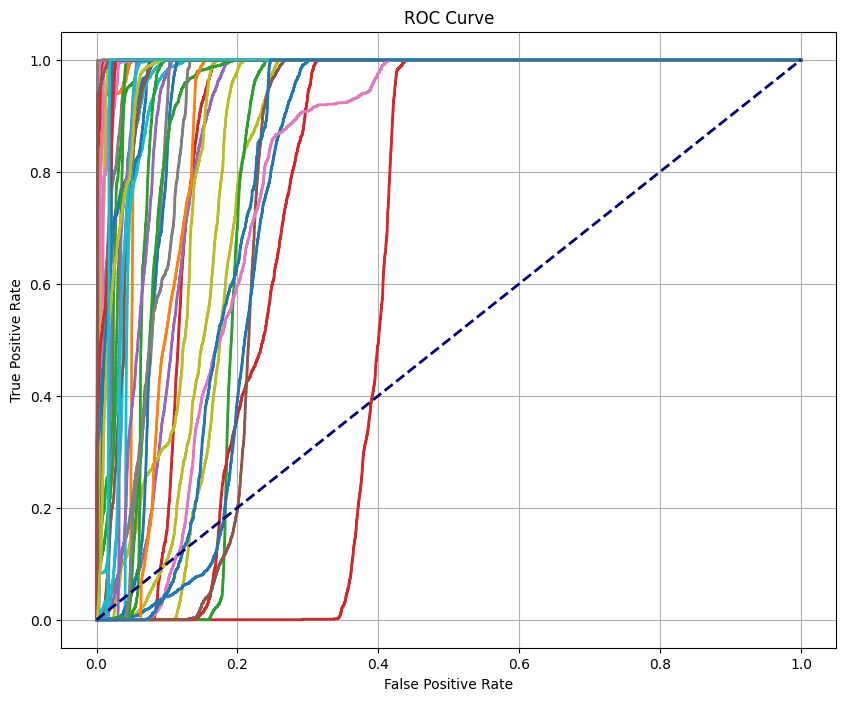

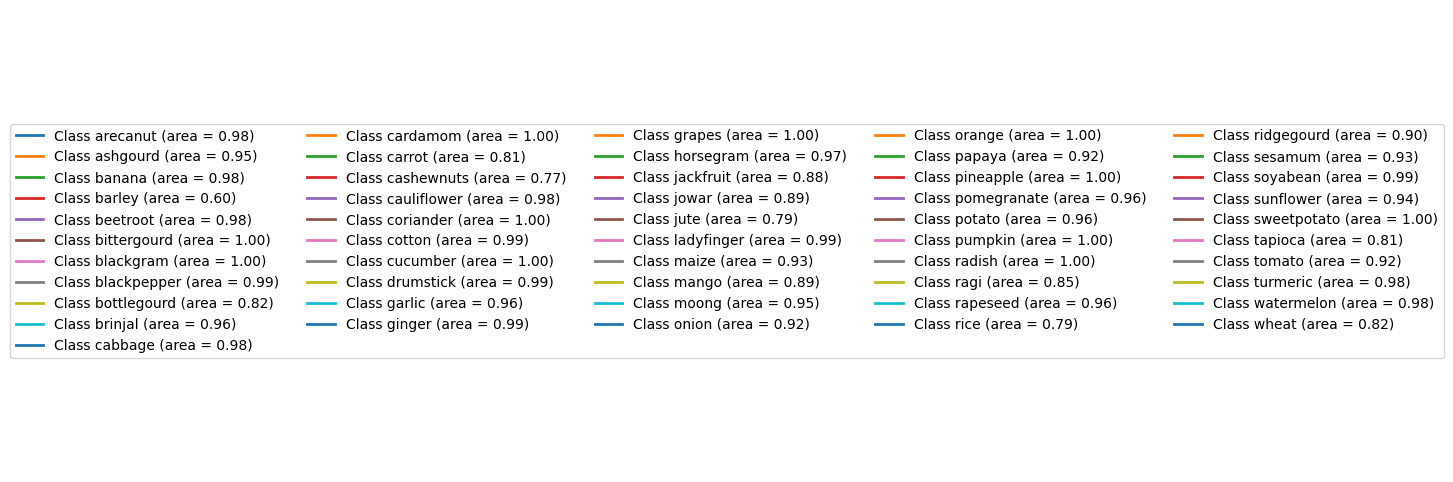

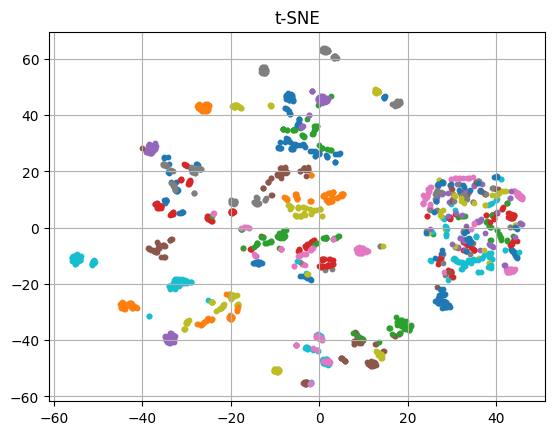

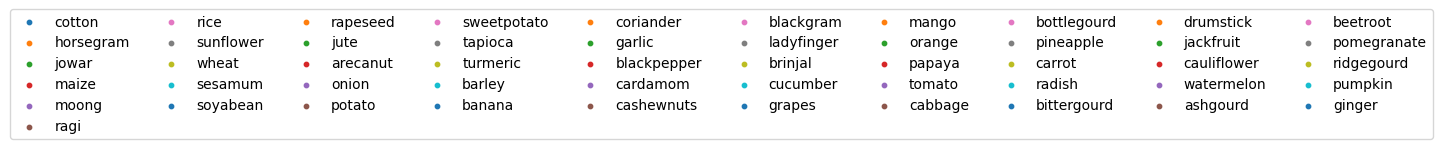

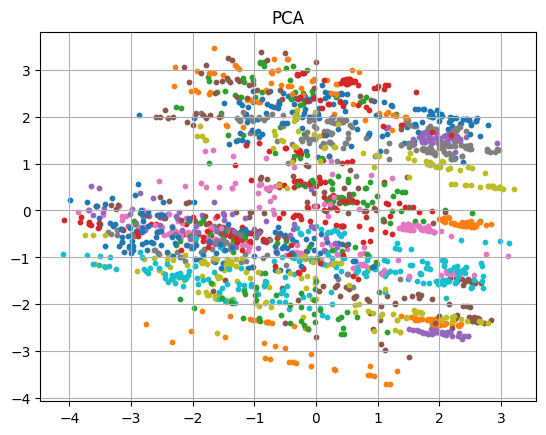

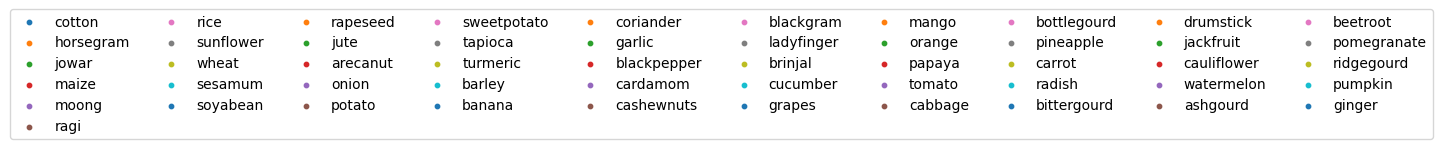

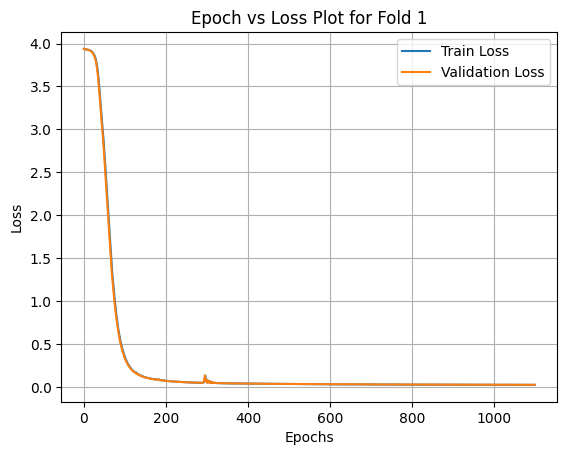

Epoch [1100/1100], Train Loss: 0.0230, Validation Loss: 0.0240
Fold 1, Train Loss: 0.023075373843312263, Train Accuracy: 99.05%, Validation Loss: 0.02396707609295845, Validation Accuracy: 98.99%
Fold 1, Train Precision: 0.9904, Train Recall: 0.9905,Train Negative Rate: 0.9998 ,Train F1: 0.9904
Fold 1, Validation Precision: 0.9899, Validation Recall: 0.9899,Validation Negative Rate: 0.9998 ,Validation F1: 0.9898
Fold 2, Train Loss: 0.029189977794885635, Train Accuracy: 99.00%, Validation Loss: 0.029310978949069977, Validation Accuracy: 99.01%
Fold 2, Train Precision: 0.9902, Train Recall: 0.9900,Train Negative Rate: 0.9998 ,Train F1: 0.9898
Fold 2, Validation Precision: 0.9903, Validation Recall: 0.9901,Validation Negative Rate: 0.9998 ,Validation F1: 0.9899
Fold 3, Train Loss: 0.025127170607447624, Train Accuracy: 99.05%, Validation Loss: 0.02605367638170719, Validation Accuracy: 98.99%
Fold 3, Train Precision: 0.9906, Train Recall: 0.9905,Train Negative Rate: 0.9998 ,Train F1: 0.9903


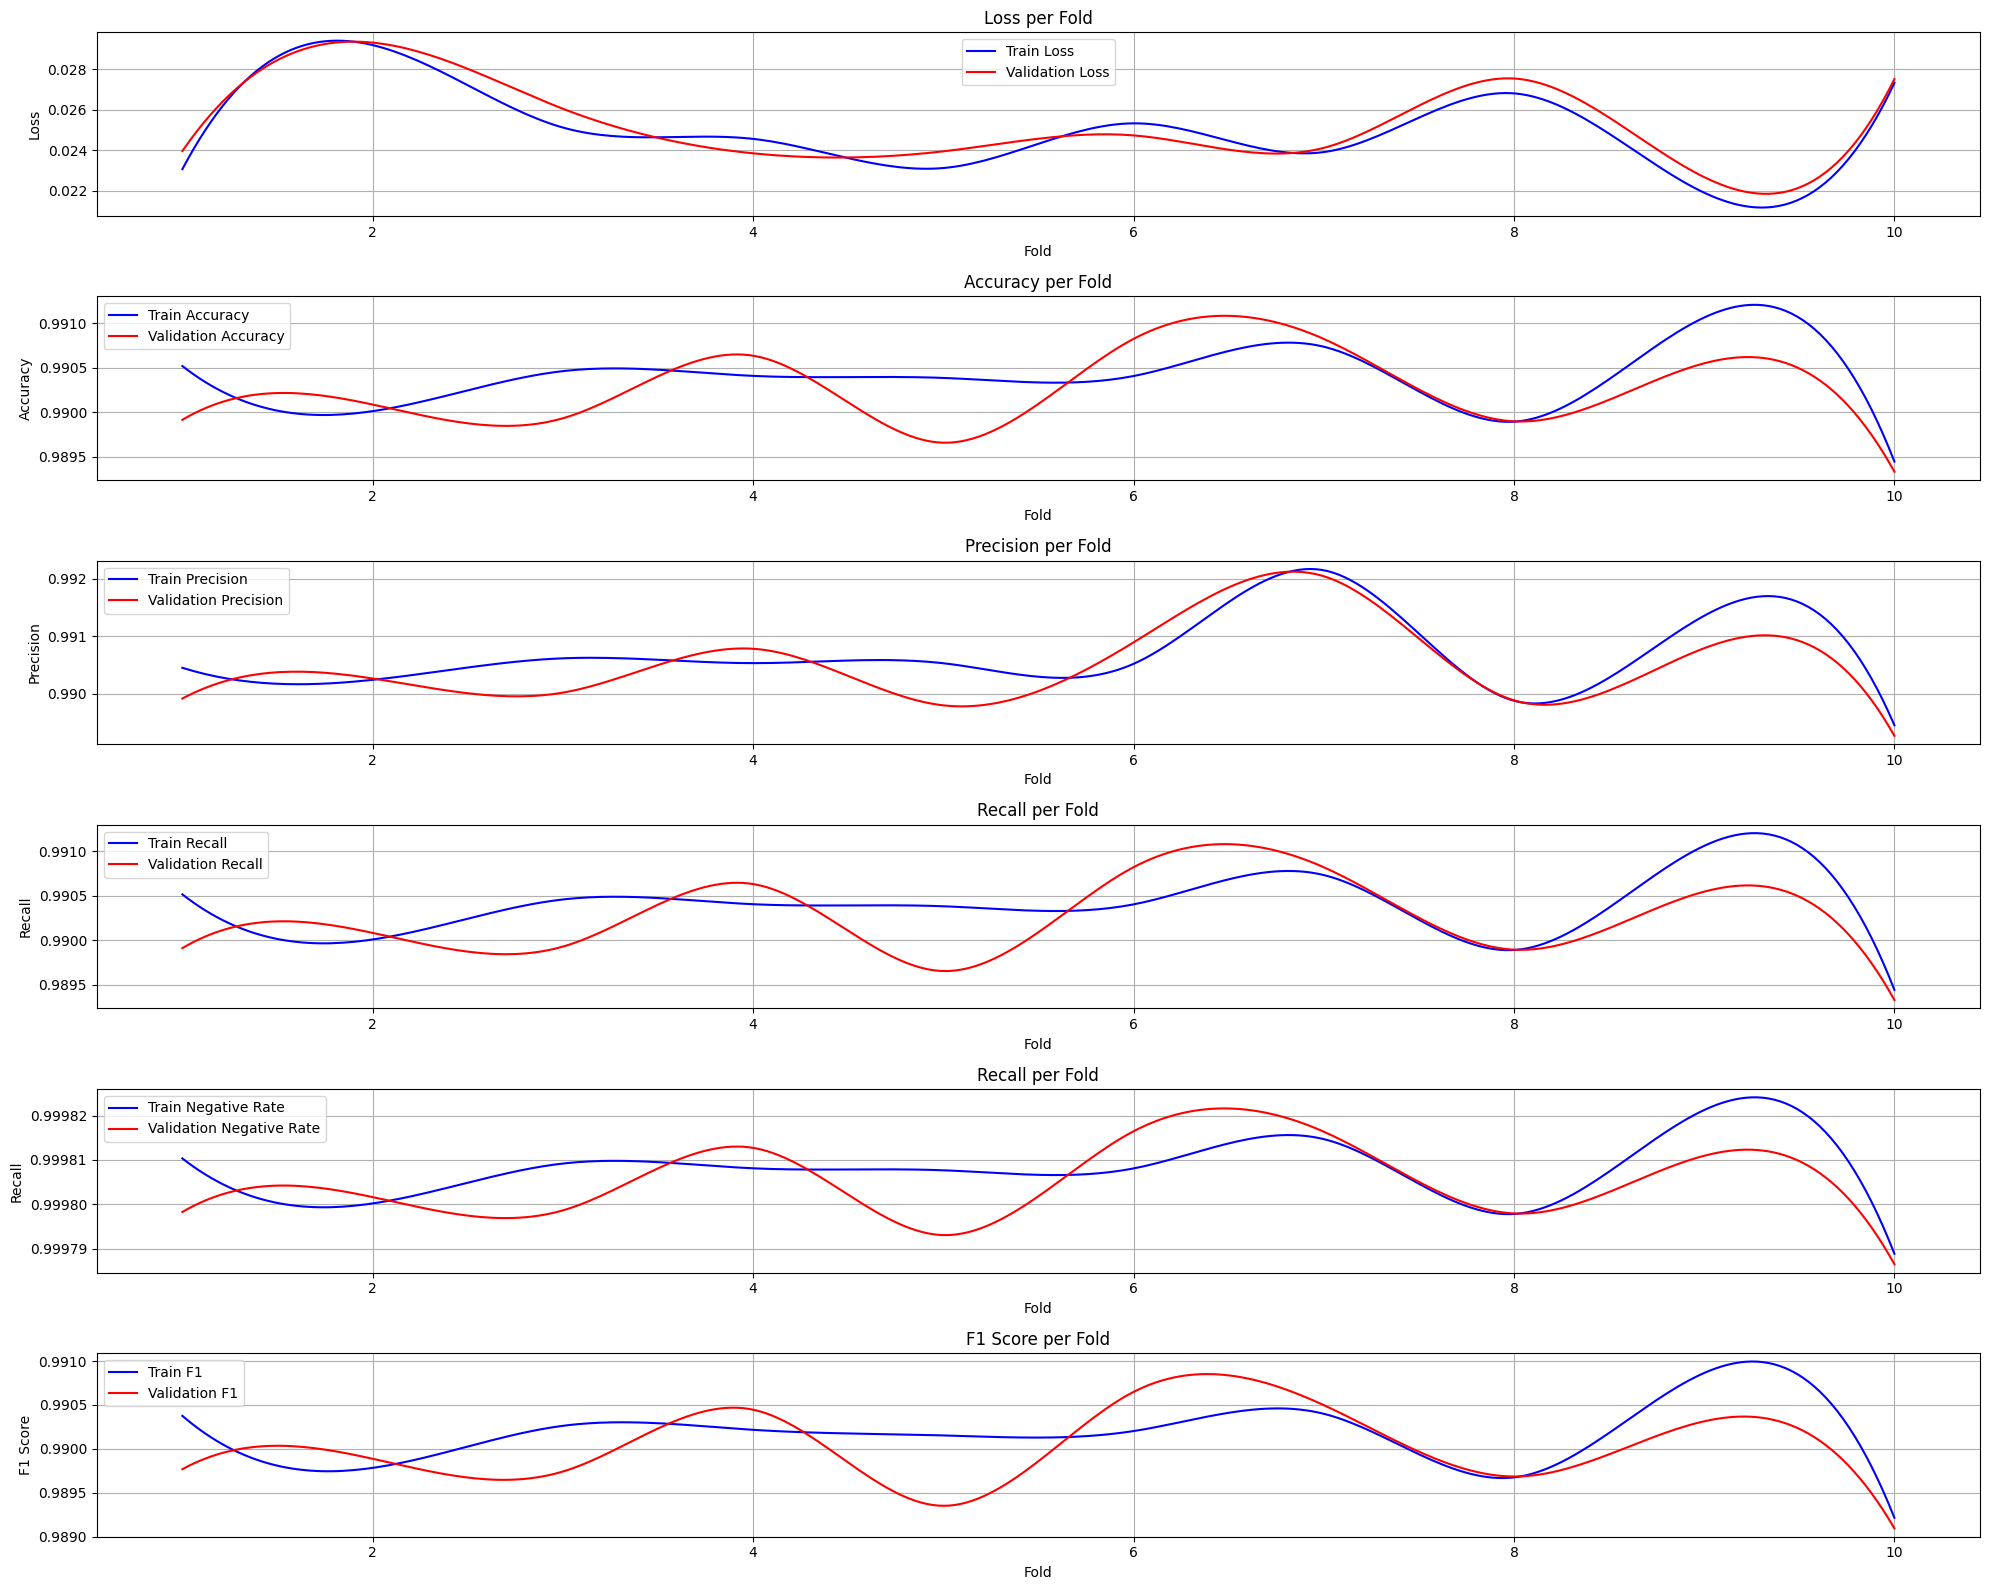

Average Train Loss: 0.0250
Average Validation Loss: 0.0254
Average Train Accuracy: 0.9903
Average Validation Accuracy: 0.9902
Average Train Precision: 0.9906
Average Validation Precision: 0.9904
Average Train Recall: 0.9903
Average Validation Recall: 0.9902
Average Train Negative Rate: 0.9998
Average Validation Negative Rate: 0.9998
Average Train F1: 0.9901
Average Validation F1: 0.9899


In [ ]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values

print("SMOTE")

ROSample = SMOTE()
features,target = ROSample.fit_resample(features,target)


features = torch.tensor(features, dtype=torch.float32).float().to("cuda")
target = torch.tensor(target, dtype=torch.long).long().to("cuda")
name = f"{model_name}_SMOTE"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model,criterion = train_validation(train_features, test_features, train_target, test_target,name)
df4 = cross_check(features,target,name)

SMOTE + Tomek


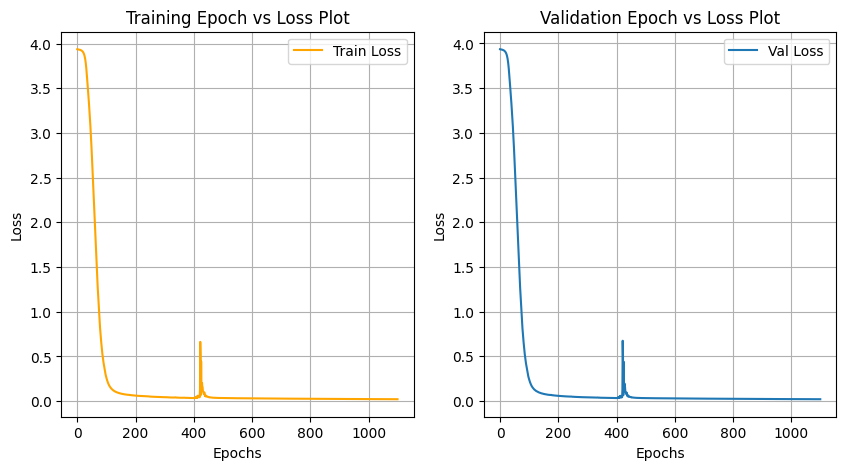

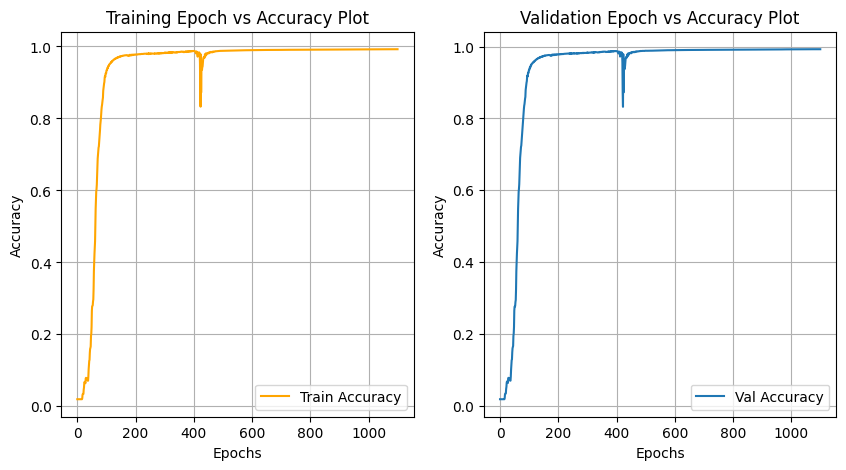

Test Accuracy: 99.27%


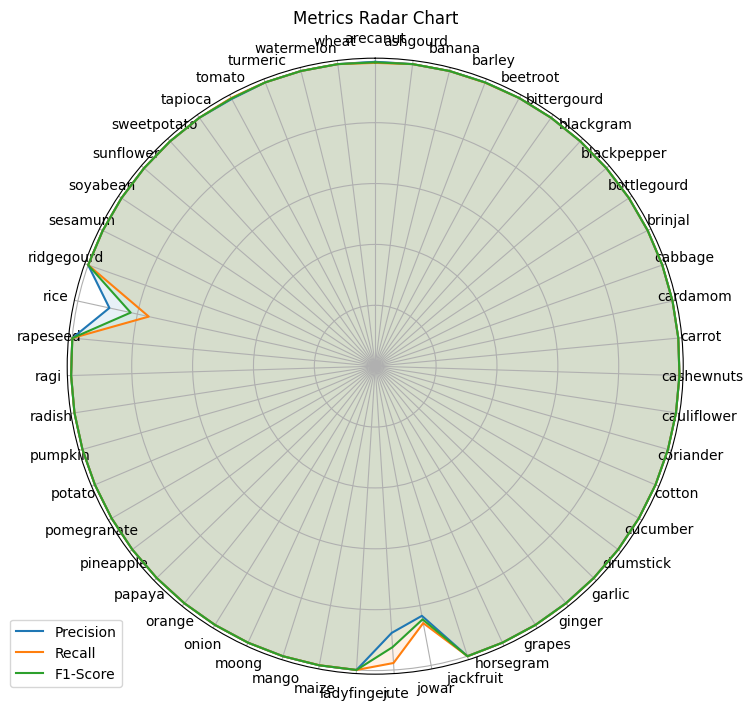

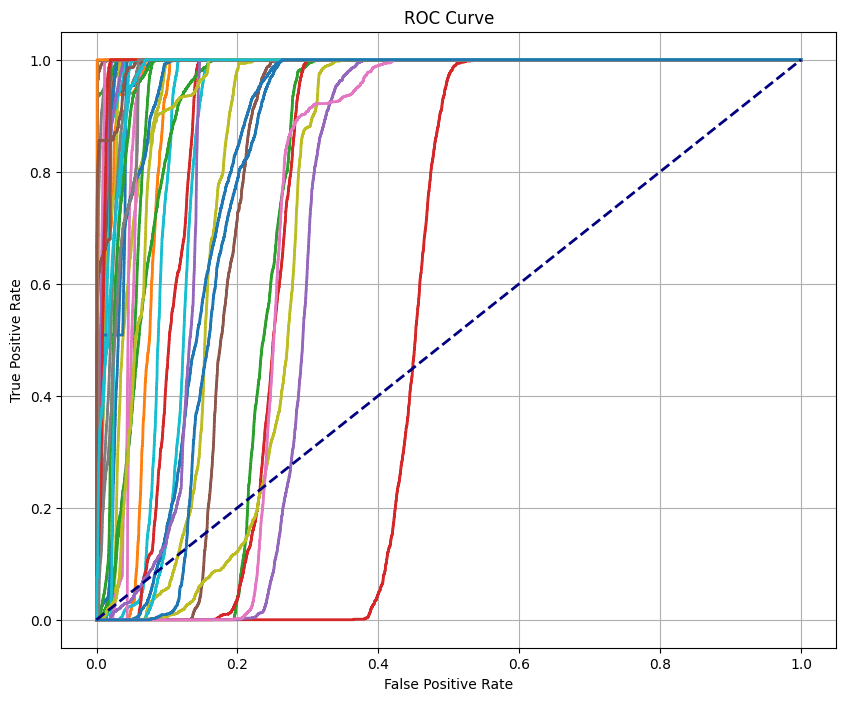

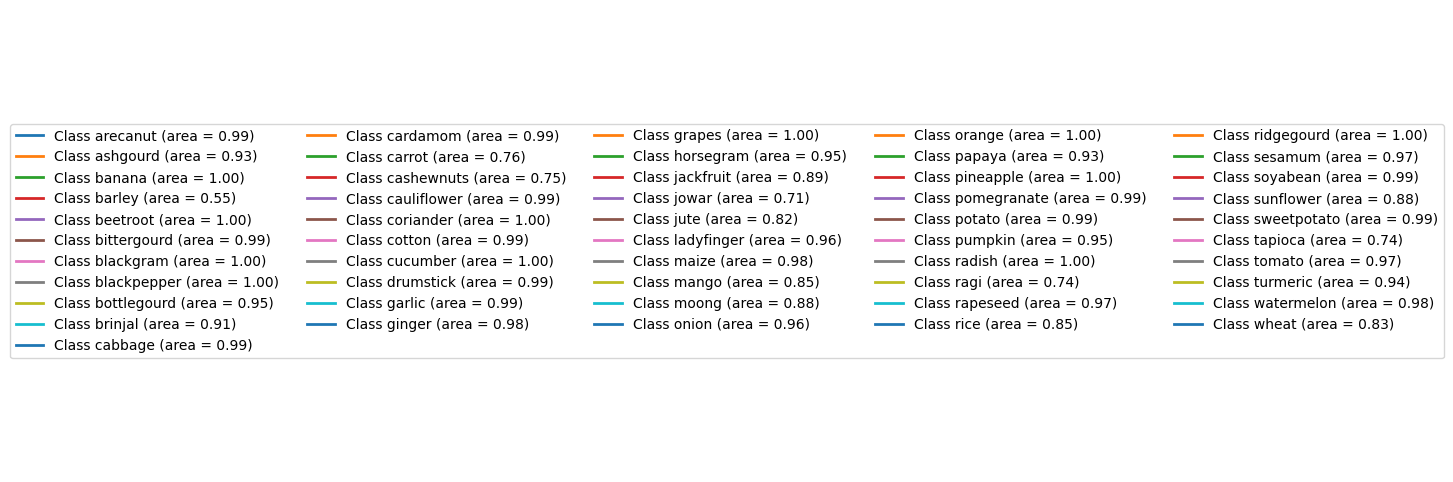

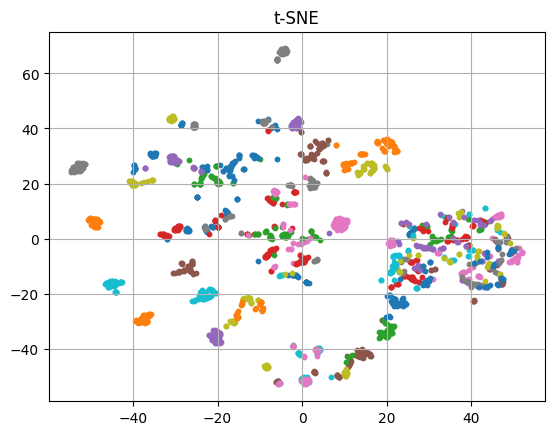

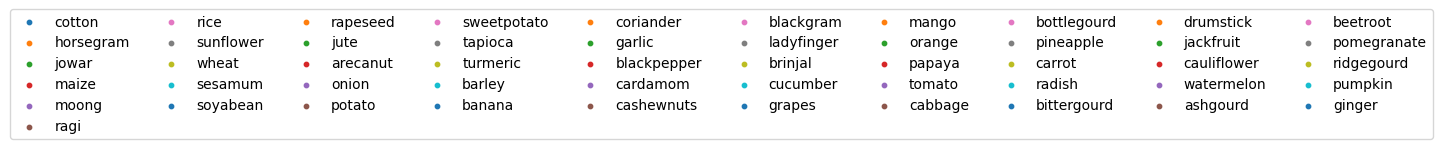

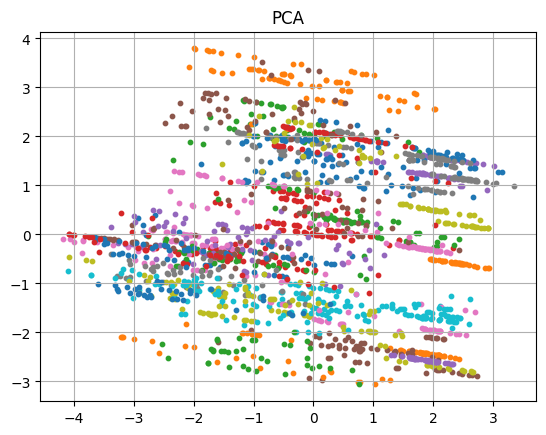

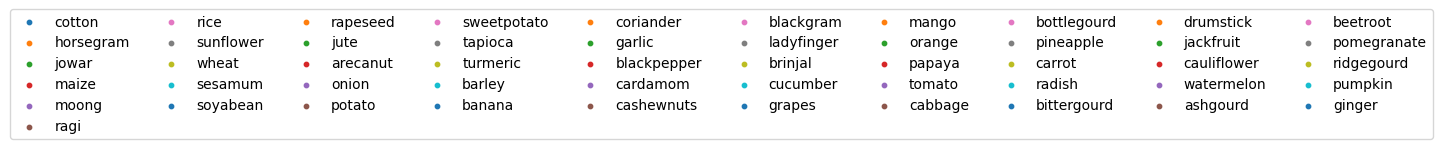

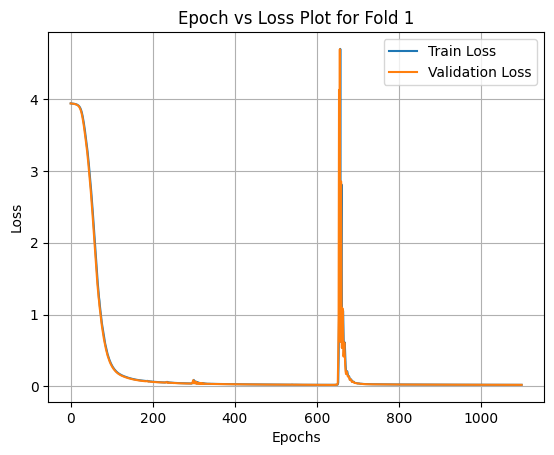

Epoch [1100/1100], Train Loss: 0.0230, Validation Loss: 0.0229
Fold 1, Train Loss: 0.023024218156933784, Train Accuracy: 99.23%, Validation Loss: 0.022932421416044235, Validation Accuracy: 99.25%
Fold 1, Train Precision: 0.9924, Train Recall: 0.9923,Train Negative Rate: 0.9998 ,Train F1: 0.9921
Fold 1, Validation Precision: 0.9926, Validation Recall: 0.9925,Validation Negative Rate: 0.9999 ,Validation F1: 0.9924
Fold 2, Train Loss: 0.021725818514823914, Train Accuracy: 99.18%, Validation Loss: 0.021243367344141006, Validation Accuracy: 99.20%
Fold 2, Train Precision: 0.9922, Train Recall: 0.9918,Train Negative Rate: 0.9998 ,Train F1: 0.9916
Fold 2, Validation Precision: 0.9923, Validation Recall: 0.9920,Validation Negative Rate: 0.9998 ,Validation F1: 0.9918
Fold 3, Train Loss: 0.02137390710413456, Train Accuracy: 99.24%, Validation Loss: 0.02105354703962803, Validation Accuracy: 99.25%
Fold 3, Train Precision: 0.9925, Train Recall: 0.9924,Train Negative Rate: 0.9998 ,Train F1: 0.9923


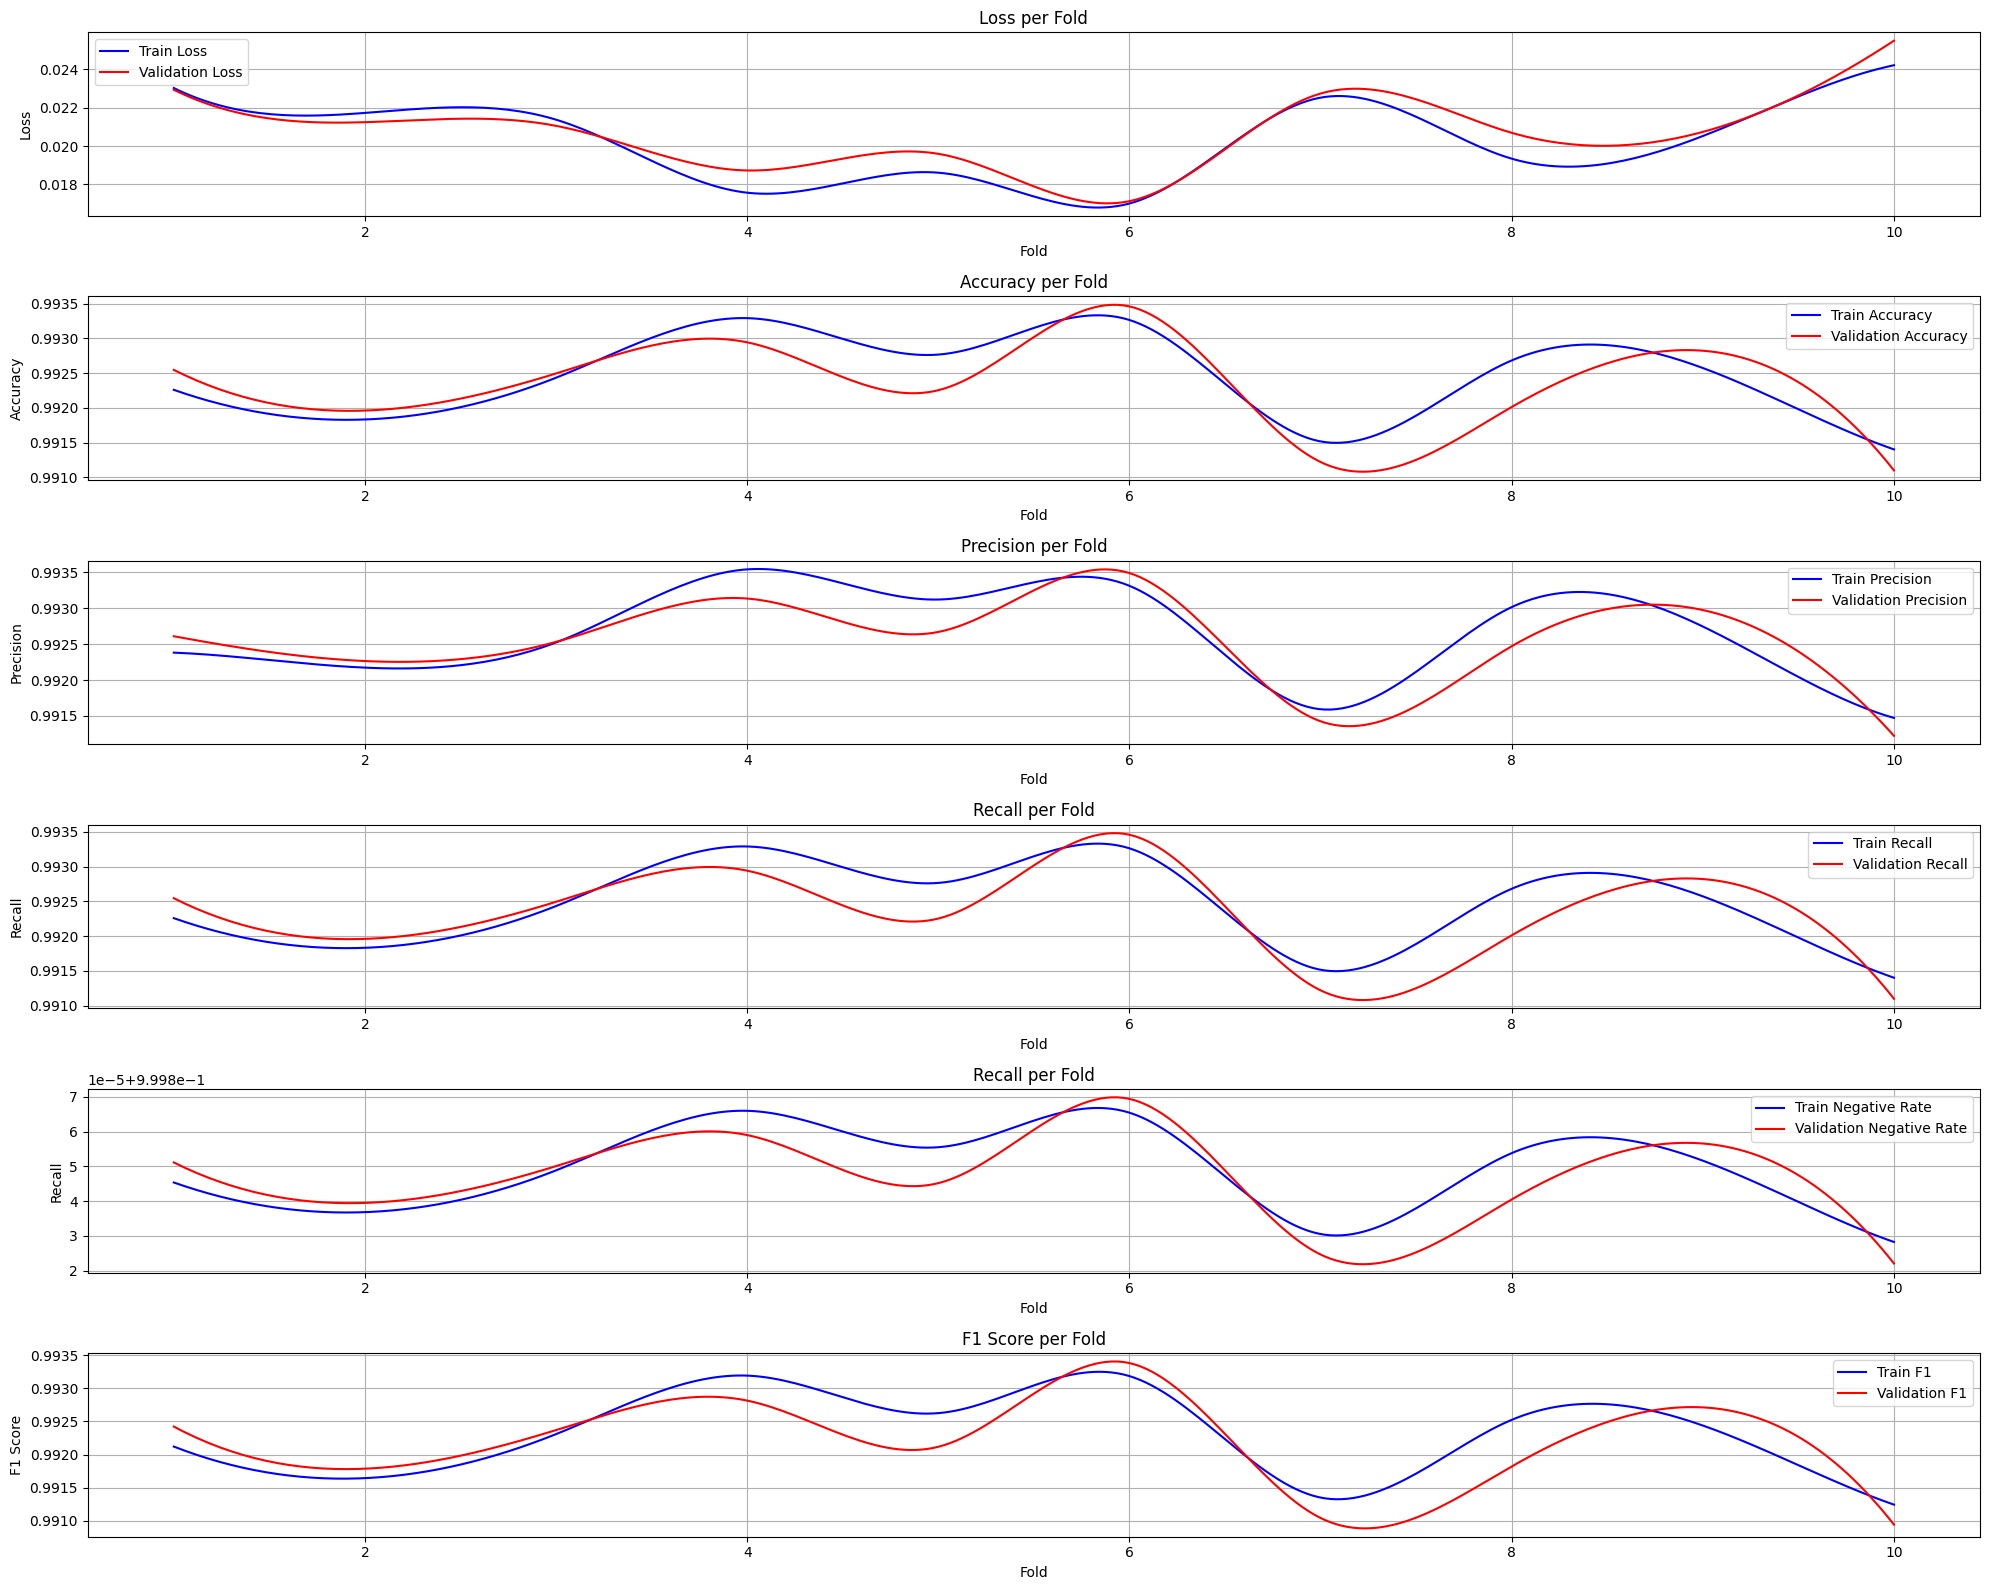

Average Train Loss: 0.0206
Average Validation Loss: 0.0210
Average Train Accuracy: 0.9924
Average Validation Accuracy: 0.9923
Average Train Precision: 0.9926
Average Validation Precision: 0.9925
Average Train Recall: 0.9924
Average Validation Recall: 0.9923
Average Train Negative Rate: 0.9998
Average Validation Negative Rate: 0.9998
Average Train F1: 0.9923
Average Validation F1: 0.9921


In [ ]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values

print("SMOTE + Tomek")

ROSample = SMOTETomek()
features,target = ROSample.fit_resample(features,target)



features = torch.tensor(features, dtype=torch.float32).float().to("cuda")
target = torch.tensor(target, dtype=torch.long).long().to("cuda")
name = f"{model_name}_SMOTETOMEK"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model,criterion = train_validation(train_features, test_features, train_target, test_target,name)
df5 = cross_check(features,target,name)

SMOTEENN


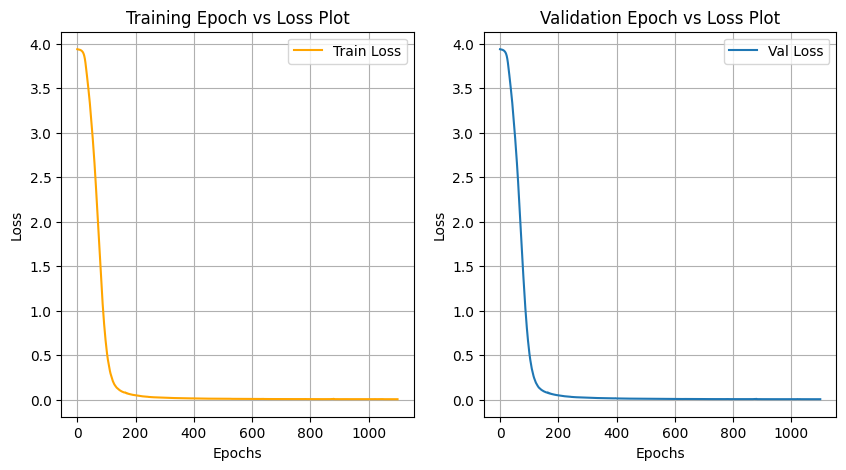

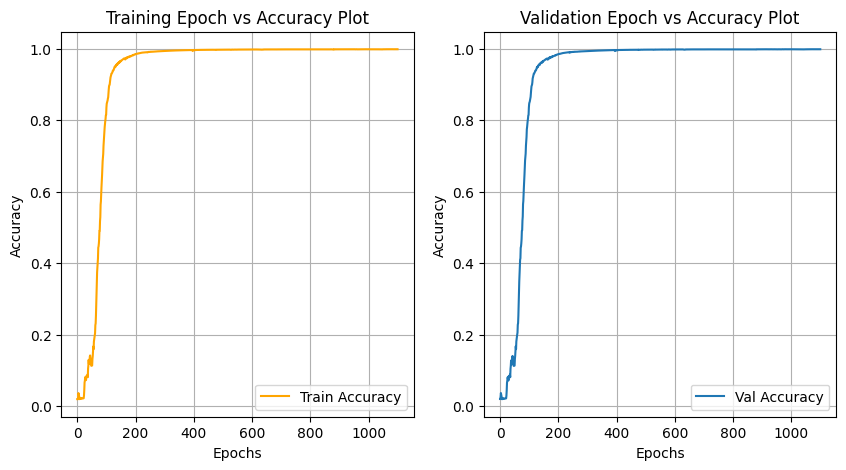

Test Accuracy: 99.82%


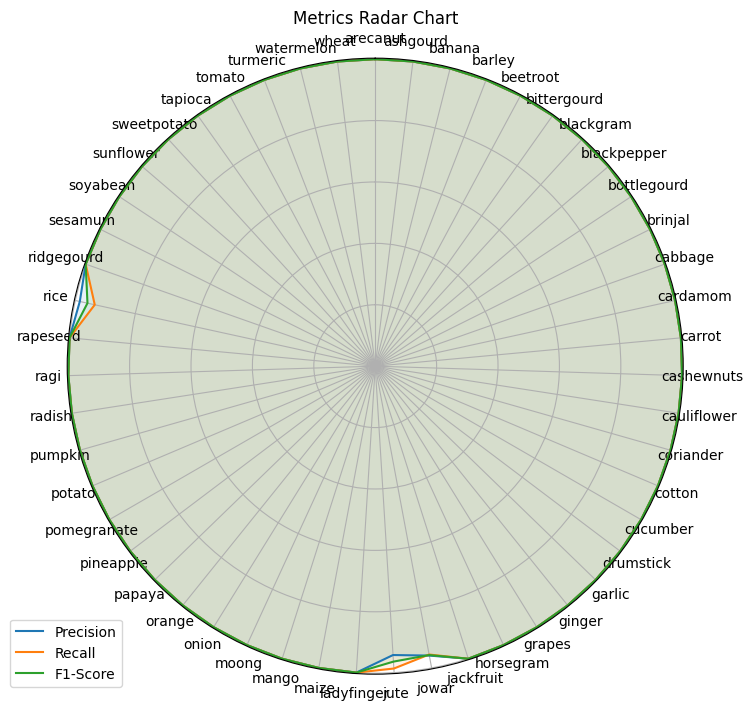

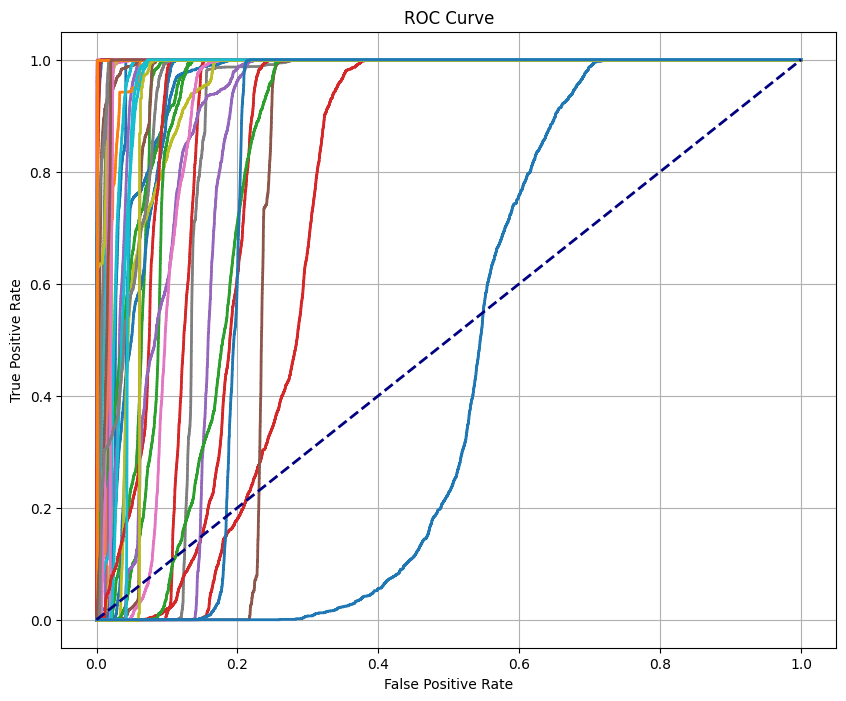

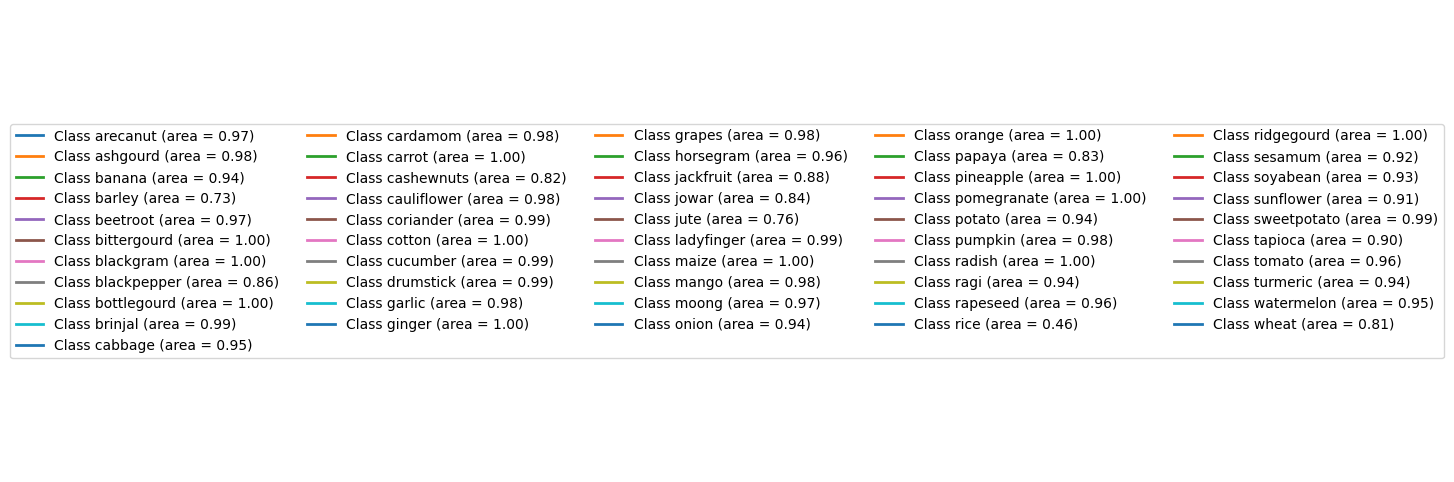

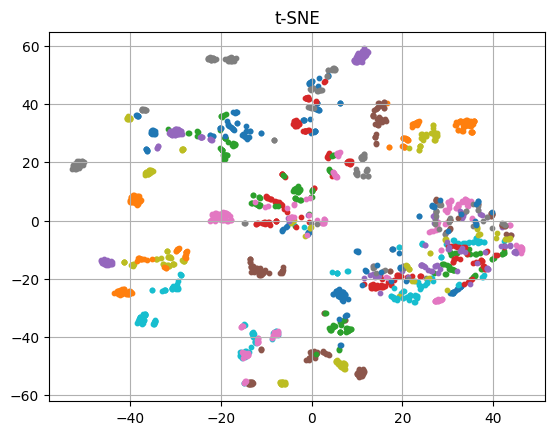

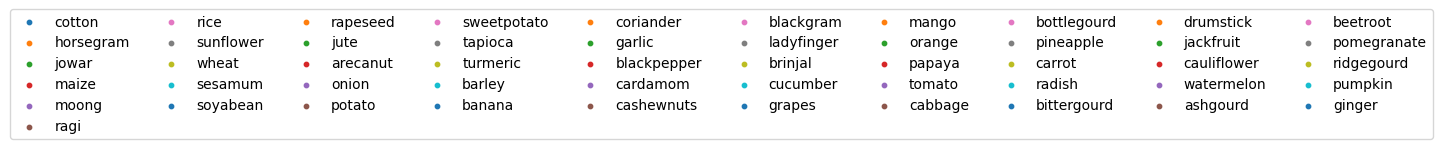

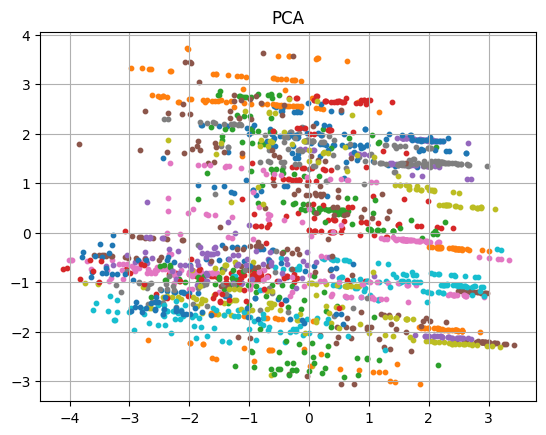

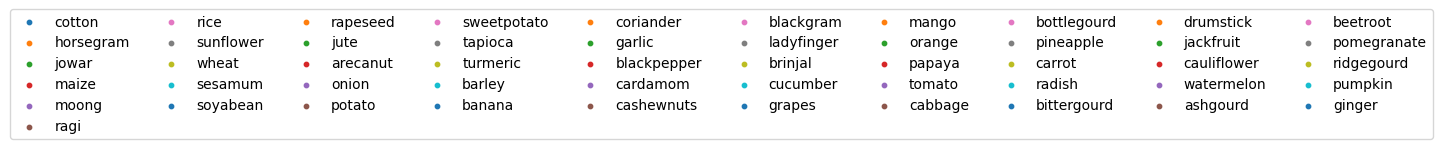

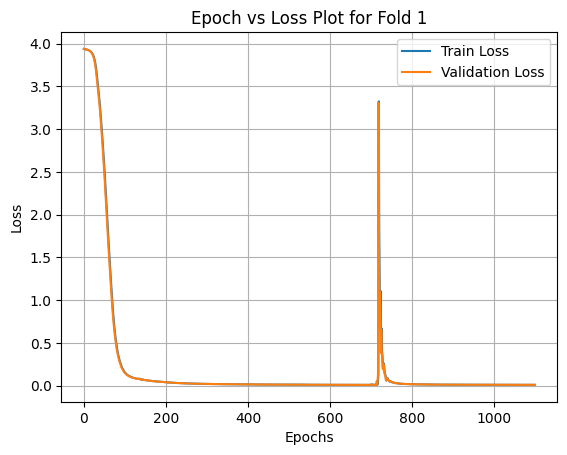

Epoch [1100/1100], Train Loss: 0.0088, Validation Loss: 0.0091
Fold 1, Train Loss: 0.008813434280455112, Train Accuracy: 99.74%, Validation Loss: 0.009088476188480854, Validation Accuracy: 99.74%
Fold 1, Train Precision: 0.9974, Train Recall: 0.9974,Train Negative Rate: 0.9999 ,Train F1: 0.9974
Fold 1, Validation Precision: 0.9974, Validation Recall: 0.9974,Validation Negative Rate: 0.9999 ,Validation F1: 0.9974
Fold 2, Train Loss: 0.007440054789185524, Train Accuracy: 99.76%, Validation Loss: 0.007484362926334143, Validation Accuracy: 99.77%
Fold 2, Train Precision: 0.9976, Train Recall: 0.9976,Train Negative Rate: 1.0000 ,Train F1: 0.9976
Fold 2, Validation Precision: 0.9977, Validation Recall: 0.9977,Validation Negative Rate: 1.0000 ,Validation F1: 0.9977
Fold 3, Train Loss: 0.015092778019607067, Train Accuracy: 99.64%, Validation Loss: 0.0156733188778162, Validation Accuracy: 99.59%
Fold 3, Train Precision: 0.9964, Train Recall: 0.9964,Train Negative Rate: 0.9999 ,Train F1: 0.9964


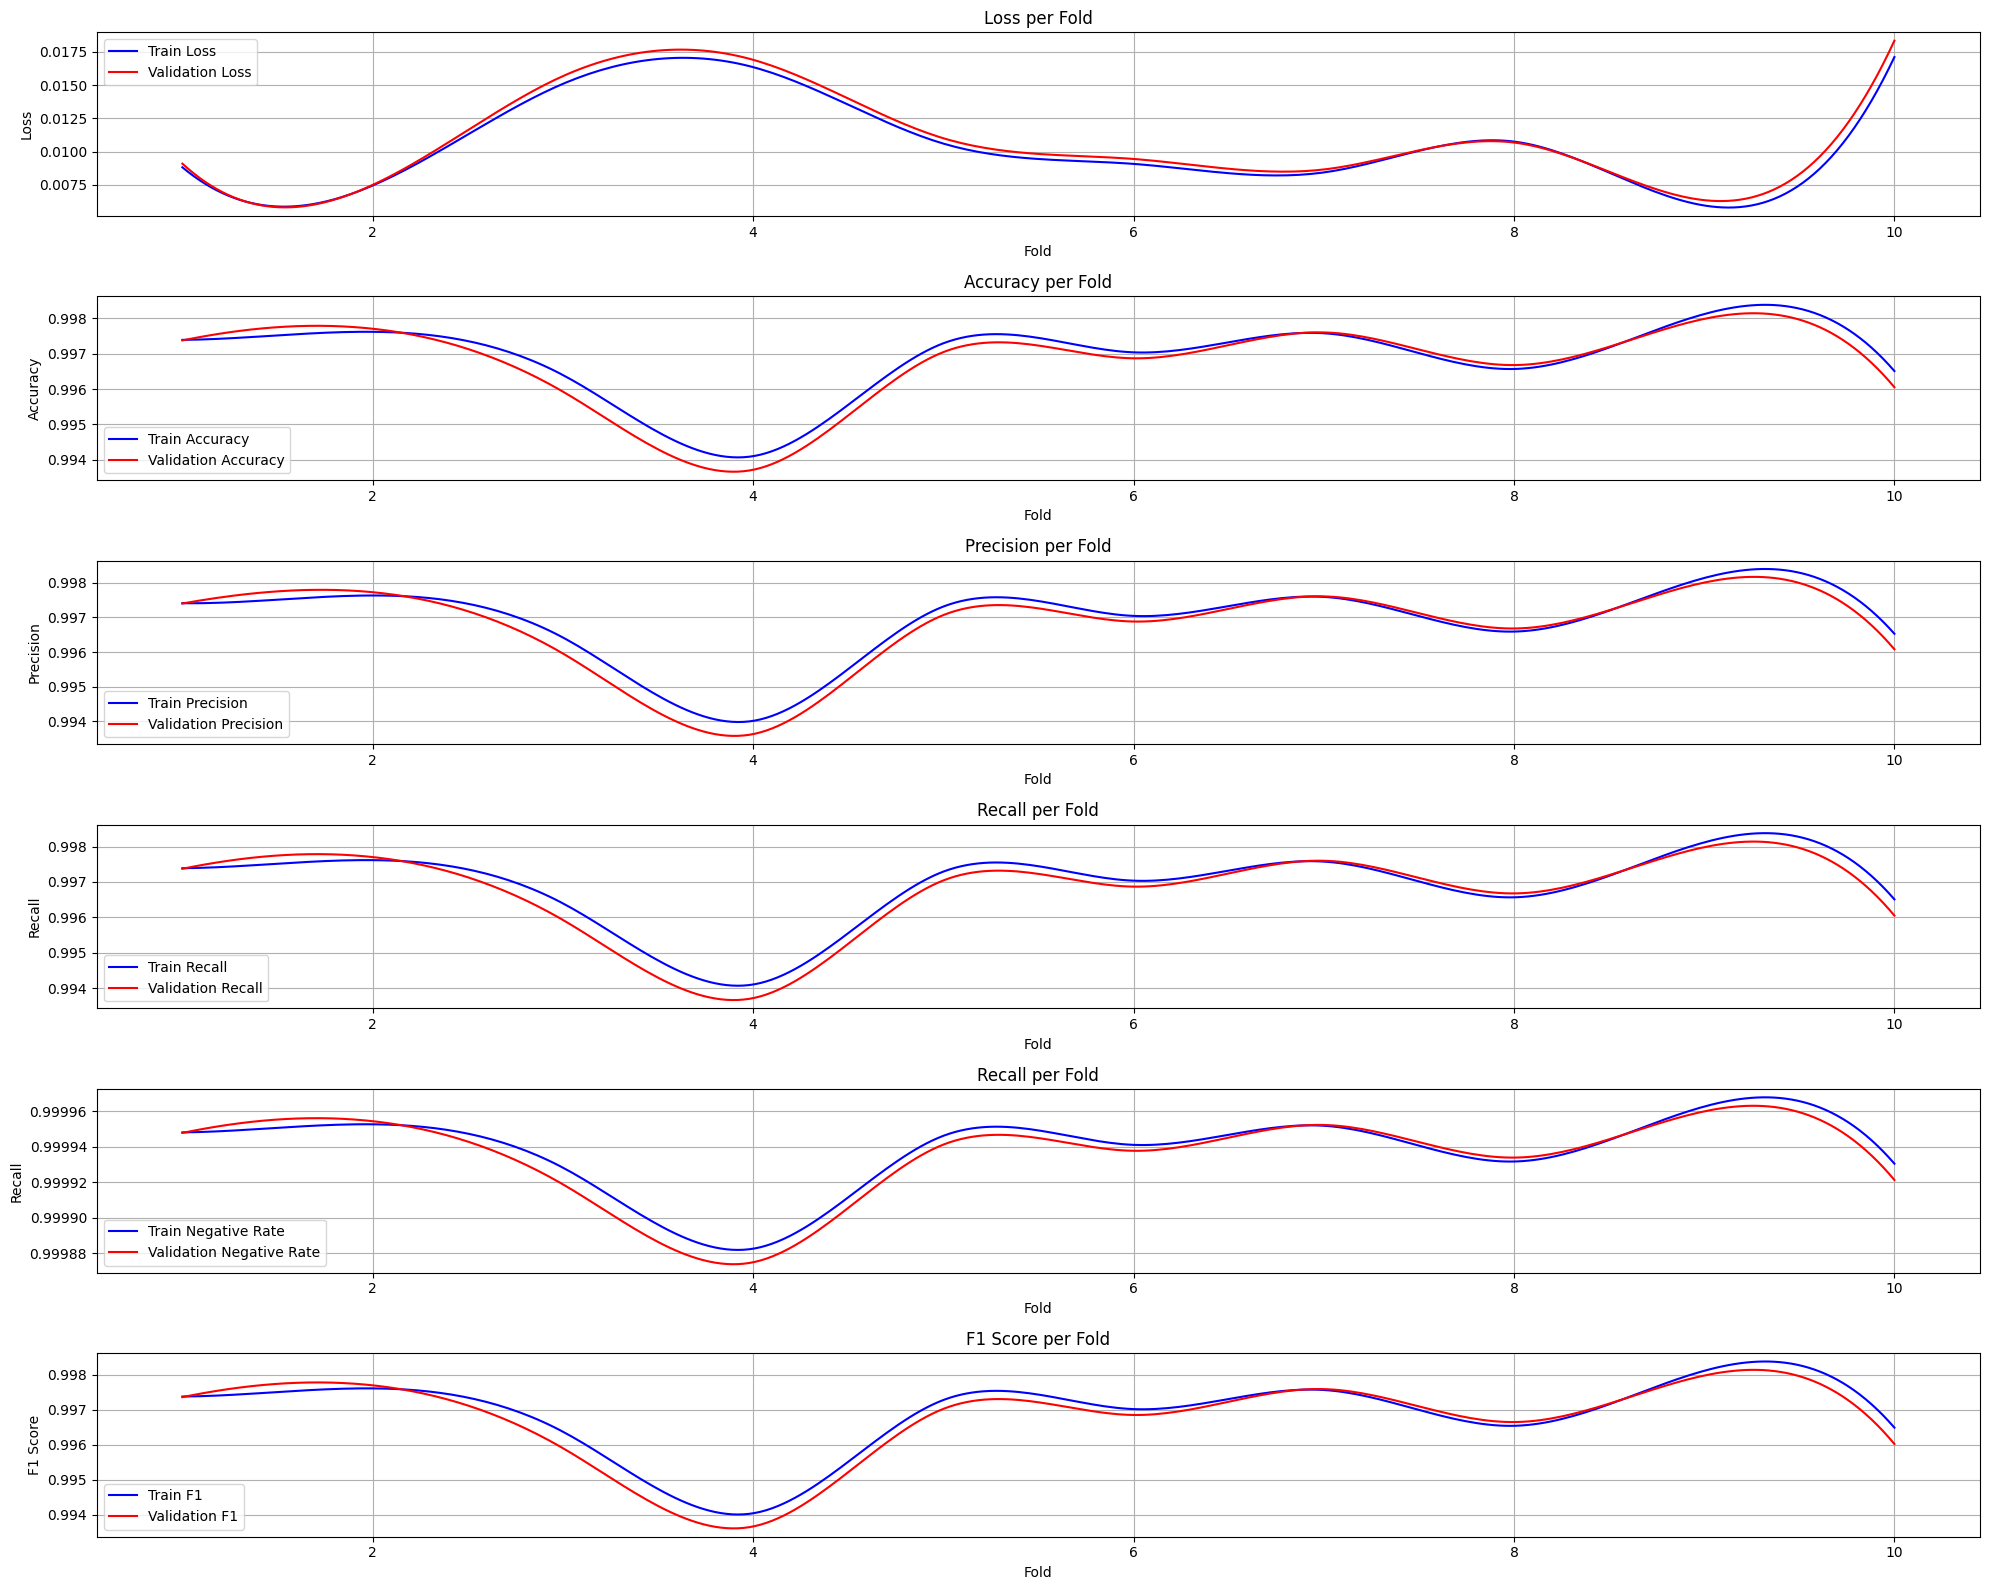

Average Train Loss: 0.0110
Average Validation Loss: 0.0114
Average Train Accuracy: 0.9969
Average Validation Accuracy: 0.9967
Average Train Precision: 0.9969
Average Validation Precision: 0.9967
Average Train Recall: 0.9969
Average Validation Recall: 0.9967
Average Train Negative Rate: 0.9999
Average Validation Negative Rate: 0.9999
Average Train F1: 0.9968
Average Validation F1: 0.9967


In [ ]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values

print("SMOTEENN")

ROSample = SMOTEENN()
features,target = ROSample.fit_resample(features,target)



features = torch.tensor(features, dtype=torch.float32).float().to("cuda")
target = torch.tensor(target, dtype=torch.long).long().to("cuda")
name = f"{model_name}_SMOTEENN"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model,criterion = train_validation(train_features, test_features, train_target, test_target,name)
df6 = cross_check(features,target,name)

In [ ]:
df1.to_csv(f"../Results/{model_name}_Initial.csv",index=False)
df2.to_csv(f"../Results/{model_name}_ROS.csv",index=False)
df3.to_csv(f"../Results/{model_name}_RUS.csv",index=False)
df4.to_csv(f"../Results/{model_name}_SMOTE.csv",index=False)
df5.to_csv(f"../Results/{model_name}_SMOTE+TOMEK.csv",index=False)
df6.to_csv(f"../Results/{model_name}_SMOTEENN.csv",index=False)